In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns


In [2]:
#Loading csv file
data = pd.read_csv(r"C:\Users\HP\Downloads\loan.csv" , low_memory=False)
                   

In [3]:
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
print (data.info() , "\n")
print(data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB
None 

(39717, 111)


There are 39717 observations and 111 characteristics .

In [5]:
#column names 

data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

In [6]:
# check data tyes
data.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object

In [7]:
len(data.id.unique())

39717

In [8]:
len(data.member_id.unique())

39717

##### There are 39717 unique id and member id 

In [9]:
len(data.index)

39717

In [10]:
#Checking null values in percentage
round (100*( data.isnull().sum() / len(data.index) ) ,2 )

id                              0.0
member_id                       0.0
loan_amnt                       0.0
funded_amnt                     0.0
funded_amnt_inv                 0.0
                              ...  
tax_liens                       0.1
tot_hi_cred_lim               100.0
total_bal_ex_mort             100.0
total_bc_limit                100.0
total_il_high_credit_limit    100.0
Length: 111, dtype: float64

In [11]:
# Checking  Duplicates 
data[data.duplicated() == True]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit


## Data Cleaning 

#### Change datatype and values fixing 

In [12]:
#Change datatype
data['issue_d'] = pd.to_datetime(data['issue_d'], format = '%b-%y')
data['last_pymnt_d'] =pd.to_datetime(data['last_pymnt_d'] , format ='%b-%y')
data['last_credit_pull_d'] = pd.to_datetime(data['last_credit_pull_d'] , format ='%b-%y')

# Value Fixing 
data['int_rate'] = data['int_rate'].str.rstrip('%').astype(float)

In [13]:
#There is extra space at the left of values in term column 
print (list(data['term'])[0:10])


#Remove those spaes with lstrip()

data['term'] = data['term'].str.lstrip()
print (list(data['term'])[0:10])

[' 36 months', ' 60 months', ' 36 months', ' 36 months', ' 60 months', ' 36 months', ' 60 months', ' 36 months', ' 60 months', ' 60 months']
['36 months', '60 months', '36 months', '36 months', '60 months', '36 months', '60 months', '36 months', '60 months', '60 months']


## Dealing with missing Values 

In [14]:
data.isnull().values.any()


True

In [15]:
data.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [16]:
#We can drop the columns which are having more than 30% missing values .
limit = len(data) *0.7
data.dropna(thresh = limit, axis =1 , inplace =True ) 

In [17]:
# Now check shape of data to confirm columns are dropped or not 

data.shape

(39717, 53)

In [18]:
len(data.index)

39717

In [19]:
round(100 * data.isnull().sum()/ len(data.index) ,2 )

id                            0.00
member_id                     0.00
loan_amnt                     0.00
funded_amnt                   0.00
funded_amnt_inv               0.00
term                          0.00
int_rate                      0.00
installment                   0.00
grade                         0.00
sub_grade                     0.00
emp_title                     6.19
emp_length                    2.71
home_ownership                0.00
annual_inc                    0.00
verification_status           0.00
issue_d                       0.00
loan_status                   0.00
pymnt_plan                    0.00
url                           0.00
purpose                       0.00
title                         0.03
zip_code                      0.00
addr_state                    0.00
dti                           0.00
delinq_2yrs                   0.00
earliest_cr_line              0.00
inq_last_6mths                0.00
open_acc                      0.00
pub_rec             

##### there are many columns havin less percentage of null values 

##### Drop unnecessary columns 

In [20]:
data = data.drop(['id','member_id','pymnt_plan','emp_title','title','url','zip_code','last_credit_pull_d','out_prncp','out_prncp_inv','collections_12_mths_ex_med','earliest_cr_line','policy_code','initial_list_status','acc_now_delinq','chargeoff_within_12_mths','delinq_amnt','tax_liens'], axis=1)

##### column revol_util has % sign , convert datatype and remove string 

In [21]:
data['revol_util'] = data['revol_util'].str.rstrip('%').astype('float')/100

In [22]:
data['revol_util'].head()

0    0.837
1    0.094
2    0.985
3    0.210
4    0.539
Name: revol_util, dtype: float64

In [23]:
data.revol_util.describe()

count    39667.000000
mean         0.488322
std          0.283326
min          0.000000
25%          0.254000
50%          0.493000
75%          0.724000
max          0.999000
Name: revol_util, dtype: float64

##### From above we can see there is minimum differnce between mean and median , we will impute missing values with mean. Also spread of data is minimum

In [24]:
data['revol_util'].fillna(data['revol_util'].mean(), inplace =True)

C:\Users\HP\AppData\Local\Temp\ipykernel_4028\522102543.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['revol_util'].fillna(data['revol_util'].mean(), inplace =True)


In [25]:
data['revol_util'].isnull().sum()

0

In [26]:
round(100 *data.isnull().sum() / len(data.index),2)

loan_amnt                  0.00
funded_amnt                0.00
funded_amnt_inv            0.00
term                       0.00
int_rate                   0.00
installment                0.00
grade                      0.00
sub_grade                  0.00
emp_length                 2.71
home_ownership             0.00
annual_inc                 0.00
verification_status        0.00
issue_d                    0.00
loan_status                0.00
purpose                    0.00
addr_state                 0.00
dti                        0.00
delinq_2yrs                0.00
inq_last_6mths             0.00
open_acc                   0.00
pub_rec                    0.00
revol_bal                  0.00
revol_util                 0.00
total_acc                  0.00
total_pymnt                0.00
total_pymnt_inv            0.00
total_rec_prncp            0.00
total_rec_int              0.00
total_rec_late_fee         0.00
recoveries                 0.00
collection_recovery_fee    0.00
last_pym

 ###### Now we will look at column pub_rec_bankruptcies

In [27]:
data['pub_rec_bankruptcies'].value_counts()

pub_rec_bankruptcies
0.0    37339
1.0     1674
2.0        7
Name: count, dtype: int64

In [28]:
data['pub_rec_bankruptcies'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 39717 entries, 0 to 39716
Series name: pub_rec_bankruptcies
Non-Null Count  Dtype  
--------------  -----  
39020 non-null  float64
dtypes: float64(1)
memory usage: 310.4 KB


###### As we can see it is in int datatype , It is not categorical type to impute values with the mode.

In [29]:
data['pub_rec_bankruptcies']= data['pub_rec_bankruptcies'].astype('category')

data['pub_rec_bankruptcies'].value_counts()

pub_rec_bankruptcies
0.0    37339
1.0     1674
2.0        7
Name: count, dtype: int64

###### Above we have convered it in categorical datatype , now we can impute missing values with mode (i.e most repeating value 0.)

In [30]:
md = 0
data['pub_rec_bankruptcies'] = data['pub_rec_bankruptcies'].fillna(md)



In [31]:
data['pub_rec_bankruptcies'].value_counts()

pub_rec_bankruptcies
0.0    38036
1.0     1674
2.0        7
Name: count, dtype: int64

In [32]:
round(100*(data.isnull().sum()/len(data.index)), 2)

loan_amnt                  0.00
funded_amnt                0.00
funded_amnt_inv            0.00
term                       0.00
int_rate                   0.00
installment                0.00
grade                      0.00
sub_grade                  0.00
emp_length                 2.71
home_ownership             0.00
annual_inc                 0.00
verification_status        0.00
issue_d                    0.00
loan_status                0.00
purpose                    0.00
addr_state                 0.00
dti                        0.00
delinq_2yrs                0.00
inq_last_6mths             0.00
open_acc                   0.00
pub_rec                    0.00
revol_bal                  0.00
revol_util                 0.00
total_acc                  0.00
total_pymnt                0.00
total_pymnt_inv            0.00
total_rec_prncp            0.00
total_rec_int              0.00
total_rec_late_fee         0.00
recoveries                 0.00
collection_recovery_fee    0.00
last_pym

In [33]:
data[data['last_pymnt_d'].isnull()]['loan_status'].unique()

array(['Charged Off'], dtype=object)

###### From above we can say that , for "charged_off" loan status there are many last_pymnt_d is null

In [34]:
data['last_pymnt_d'].isnull().sum()

71

In [35]:
data.loan_status.unique()

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

In [36]:
data[data['last_pymnt_d'].isnull() == True]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,application_type,pub_rec_bankruptcies
26,15000,15000,8725.0,36 months,14.27,514.64,C,C2,9 years,RENT,...,0.00,0.0,0.0,0.0,0.00,0.0000,NaT,0.0,INDIVIDUAL,0.0
2724,8000,8000,3975.0,36 months,14.65,275.96,C,C3,10+ years,RENT,...,0.00,0.0,0.0,0.0,0.00,0.0000,NaT,0.0,INDIVIDUAL,0.0
3613,6400,6400,6400.0,60 months,18.25,163.39,D,D5,5 years,RENT,...,366.75,0.0,0.0,0.0,366.75,66.0150,NaT,0.0,INDIVIDUAL,0.0
3985,18000,18000,18000.0,60 months,19.03,467.23,E,E2,4 years,RENT,...,0.00,0.0,0.0,0.0,0.00,0.0000,NaT,0.0,INDIVIDUAL,0.0
4206,1800,1800,1800.0,36 months,8.90,57.16,A,A5,9 years,RENT,...,1800.00,0.0,0.0,0.0,1800.00,0.0000,NaT,0.0,INDIVIDUAL,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36185,20000,20000,13975.0,36 months,11.89,663.28,B,B4,10+ years,MORTGAGE,...,3139.36,0.0,0.0,0.0,4493.30,1381.4454,NaT,0.0,INDIVIDUAL,0.0
36206,7800,7800,7725.0,36 months,10.95,255.17,B,B1,< 1 year,RENT,...,0.00,0.0,0.0,0.0,0.00,0.0000,NaT,0.0,INDIVIDUAL,0.0
36209,2000,2000,2000.0,36 months,16.00,70.32,E,E2,< 1 year,RENT,...,89.99,0.0,0.0,0.0,89.99,0.9000,NaT,0.0,INDIVIDUAL,0.0
36937,25000,25000,11625.0,36 months,13.79,851.89,C,C5,1 year,MORTGAGE,...,0.00,0.0,0.0,0.0,0.00,0.0000,NaT,0.0,INDIVIDUAL,0.0


To find out number of months paid ,  we have to do total_pymnt/installment 

In [37]:
# Create new derived metric to store the number of months the borrower has paid
data['num_of_mnts_paid'] = round(data['total_pymnt']/data['installment'])

#Convert datatype to int.
data['num_of_mnts_paid'] =data['num_of_mnts_paid'].astype(int)



In [38]:
#To see 5 rows of data 
data.loc[data['last_pymnt_d'].isnull() , ['funded_amnt','int_rate','installment','issue_d','last_pymnt_d','total_pymnt','num_of_mnts_paid']].head()


,funded_amnt,int_rate,installment,issue_d,last_pymnt_d,total_pymnt,num_of_mnts_paid
26,15000,14.27,514.64,2011-12-01,NaT,0.00,0
2724,8000,14.65,275.96,2011-11-01,NaT,0.00,0
3613,6400,18.25,163.39,2011-11-01,NaT,366.75,2
3985,18000,19.03,467.23,2011-11-01,NaT,0.00,0
4206,1800,8.90,57.16,2011-11-01,NaT,1800.00,31


Create a column to store the last payment date which is created based on 'issue_d','num_of_mnts_paid columns
 Add +1 to date_of_mnts_paid as monthly installment will start from issue_d+1

In [39]:
data['date_of_mnts_paid'] = data.loc[data['num_of_mnts_paid']!=0, ['issue_d','num_of_mnts_paid']].apply(lambda x: x['issue_d'] + pd.DateOffset(months = x['num_of_mnts_paid']+1), axis=1)
data['date_of_mnts_paid']

0       2015-01-01
1       2013-06-01
2       2015-01-01
3       2015-01-01
4       2016-05-01
           ...    
39712   2010-08-01
39713   2010-08-01
39714   2010-06-01
39715   2010-05-01
39716   2010-07-01
Name: date_of_mnts_paid, Length: 39717, dtype: datetime64[ns]

In [40]:
#We have to fill null values in column last_pymnt_d ,with help of date_of_mnts_paid.

data['last_pymnt_d'] = data['last_pymnt_d'].fillna(data['date_of_mnts_paid'])

In [41]:
# Now we will delete column date_of_mnts_paid 
data = data.drop(['date_of_mnts_paid'], axis=1)

In [42]:
data['term'] = data['term'].str.rstrip('months')

In [43]:
data.loc[data['last_pymnt_d'].isnull(), ['term','funded_amnt','int_rate','installment','issue_d','last_pymnt_d','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','num_of_mnts_paid']]



,term,funded_amnt,int_rate,installment,issue_d,last_pymnt_d,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,num_of_mnts_paid
26,36,15000,14.27,514.64,2011-12-01,NaT,0.0,0.0,0.0,0.0,0
2724,36,8000,14.65,275.96,2011-11-01,NaT,0.0,0.0,0.0,0.0,0
3985,60,18000,19.03,467.23,2011-11-01,NaT,0.0,0.0,0.0,0.0,0
6967,60,2200,19.42,57.58,2011-09-01,NaT,0.0,0.0,0.0,0.0,0
8707,60,35000,13.99,814.21,2011-09-01,NaT,0.0,0.0,0.0,0.0,0
14220,36,3450,11.99,114.58,2011-05-01,NaT,0.0,0.0,0.0,0.0,0
14642,36,5000,16.49,177.00,2011-05-01,NaT,0.0,0.0,0.0,0.0,0
16301,36,10000,13.43,339.02,2011-04-01,NaT,0.0,0.0,0.0,0.0,0
16719,60,5550,13.06,126.46,2011-04-01,NaT,0.0,0.0,0.0,0.0,0
18316,36,10000,13.80,340.81,2011-03-01,NaT,0.0,0.0,0.0,0.0,0


As the total_pymnt value is 0, we can't find the number of months, also there is no info about other columns like 'total_pymnt_inv','total_rec_prncp','total_rec_int' and as this is very minimal observations let's drop these 16 observations

In [44]:
data=data[pd.notnull(data['last_pymnt_d'])]

In [45]:
round(100* data.isnull().sum() / len(data.index) ,2)

loan_amnt                  0.00
funded_amnt                0.00
funded_amnt_inv            0.00
term                       0.00
int_rate                   0.00
installment                0.00
grade                      0.00
sub_grade                  0.00
emp_length                 2.71
home_ownership             0.00
annual_inc                 0.00
verification_status        0.00
issue_d                    0.00
loan_status                0.00
purpose                    0.00
addr_state                 0.00
dti                        0.00
delinq_2yrs                0.00
inq_last_6mths             0.00
open_acc                   0.00
pub_rec                    0.00
revol_bal                  0.00
revol_util                 0.00
total_acc                  0.00
total_pymnt                0.00
total_pymnt_inv            0.00
total_rec_prncp            0.00
total_rec_int              0.00
total_rec_late_fee         0.00
recoveries                 0.00
collection_recovery_fee    0.00
last_pym

In [46]:
data.home_ownership.unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE'], dtype=object)

In [47]:
# Check the number of loans by home_ownership
data.home_ownership.value_counts()
#data.home_ownership.mode()

home_ownership
RENT        18887
MORTGAGE    17657
OWN          3056
OTHER          98
NONE            3
Name: count, dtype: int64

In [48]:
# Replace the 'NONE' with 'RENT'(mode of home_ownership column)
data['home_ownership'] = data.home_ownership.str.replace('NONE' , 'RENT')

In [49]:
data.home_ownership.value_counts()

home_ownership
RENT        18890
MORTGAGE    17657
OWN          3056
OTHER          98
Name: count, dtype: int64

In [50]:
data['emp_length'] 

0        10+ years
1         < 1 year
2        10+ years
3        10+ years
4           1 year
           ...    
39712      4 years
39713      3 years
39714     < 1 year
39715     < 1 year
39716     < 1 year
Name: emp_length, Length: 39701, dtype: object

In [51]:
data.emp_length.unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [52]:
data['emp_length'].value_counts()

emp_length
10+ years    8877
< 1 year     4580
2 years      4388
3 years      4093
4 years      3433
5 years      3281
1 year       3238
6 years      2229
7 years      1773
8 years      1478
9 years      1257
Name: count, dtype: int64

In [53]:
#modifications in emp_length column
data['emp_length'] = data.emp_length.str.replace('years' ,'')
data['emp_length'] =  data.emp_length.str.replace('year','')

data['emp_length'] = data.emp_length.str.replace('+','')
data['emp_length'] = data.emp_length.str.replace('< 1' , '0')
data['emp_length'] = data.emp_length.str.replace('n/a','10')


In [54]:
data['emp_length'] = pd.to_numeric(data['emp_length'])

data['emp_length'].head()

0    10.0
1     0.0
2    10.0
3    10.0
4     1.0
Name: emp_length, dtype: float64

# Extract Type Metrics

In [55]:
data['issued_month'] = data['issue_d'].dt.month
data['issue_year'] =data['issue_d'].dt.year

In [56]:
data['issue_year']
data['issued_month']

0        12
1        12
2        12
3        12
4        12
         ..
39712     7
39713     7
39714     7
39715     7
39716     6
Name: issued_month, Length: 39701, dtype: int32

In [57]:
#Now we have t calculate return of Investment(ROI) by (total_pymnt-collection_recovery_fee/funded_amnt)-1
data['roi'] = round(((data['total_pymnt'] -data['collection_recovery_fee'])/data['funded_amnt'])-1 , 2)
data['roi'] 

0        0.17
1       -0.60
2        0.25
3        0.22
4        0.17
         ... 
39712    0.13
39713    0.17
39714    0.05
39715    0.03
39716    0.23
Name: roi, Length: 39701, dtype: float64

In [58]:
data = data[data['loan_status']!= 'Current']
data.shape

(38561, 39)

Text(0, 0.5, 'Number of loan issued')

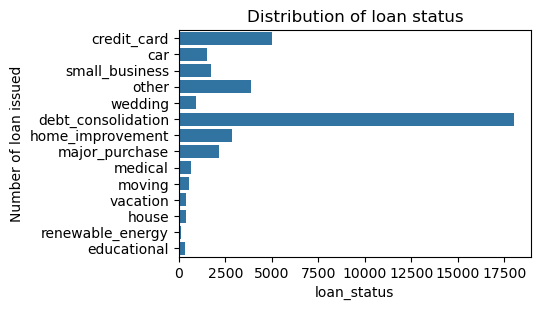

In [59]:
plt.figure(figsize=(10,10))
plt.subplot(3,2,1)
sns.countplot(y='purpose' , data =data)
plt.title('Distribution of loan status')
plt.xlabel('loan_status')
plt.ylabel("Number of loan issued")

## Univariate Analysis of unordered categorical variables

Text(0, 0.5, 'Loan Purpose')

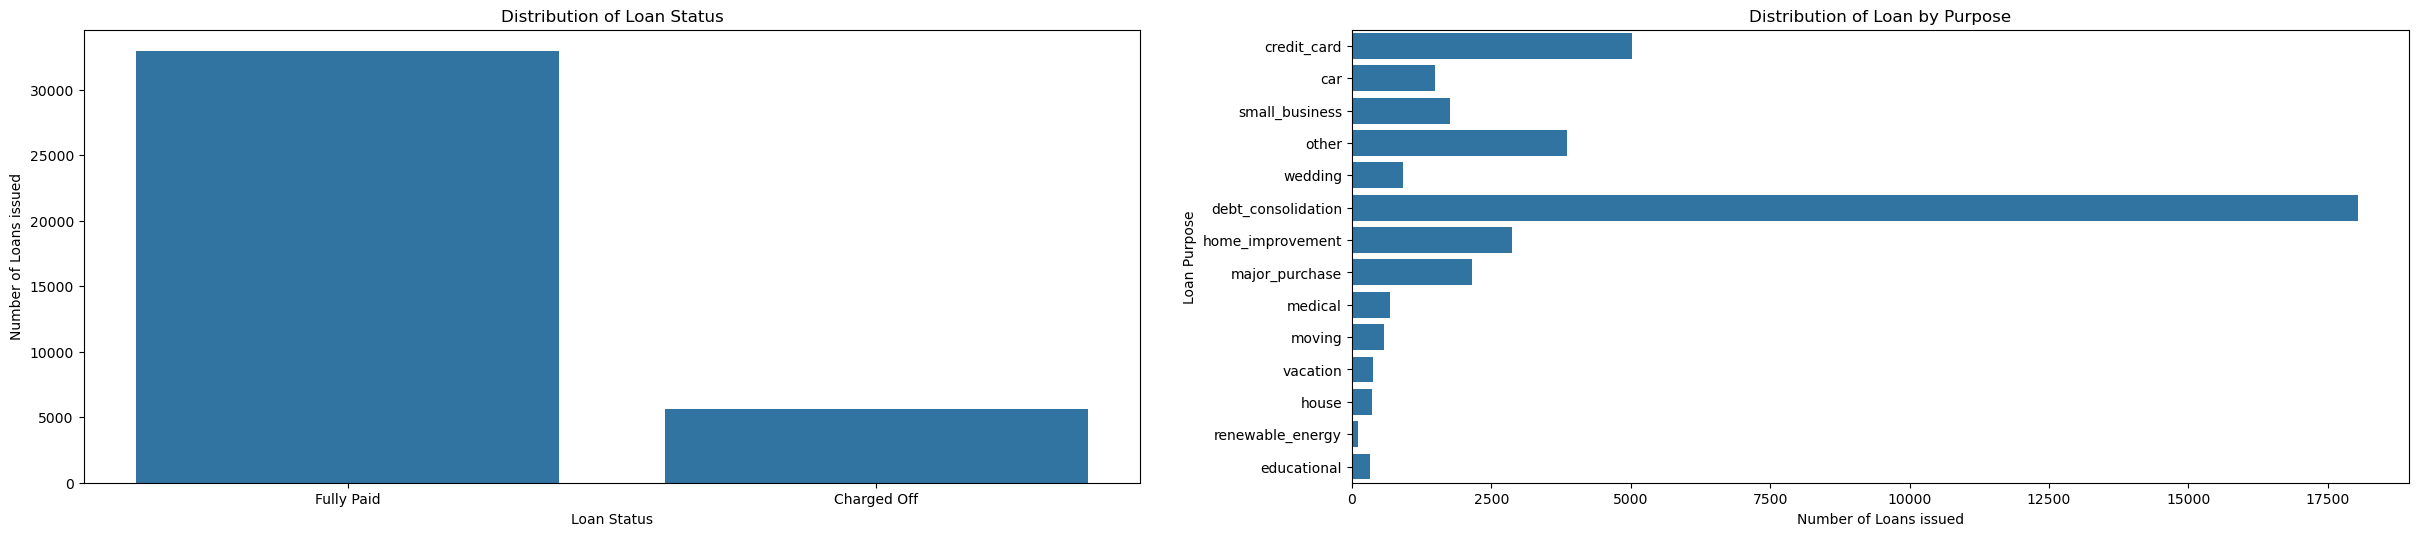

In [60]:
# Univariate Analysis on Unordered Categorical variables
plt.figure(figsize=(30,20))

plt.figure(1)

# Distribution of Loans by Status
plt.subplot(3,2,1)
sns.countplot(x='loan_status', data=data)
plt.title('Distribution of Loan Status')
plt.xlabel("Loan Status")
plt.ylabel("Number of Loans issued")

# Distribution of Loan by Purpose
plt.subplot(3,2,2)
sns.countplot(y='purpose', data=data)
plt.title('Distribution of Loan by Purpose')
plt.xlabel("Number of Loans issued")
plt.ylabel("Loan Purpose")


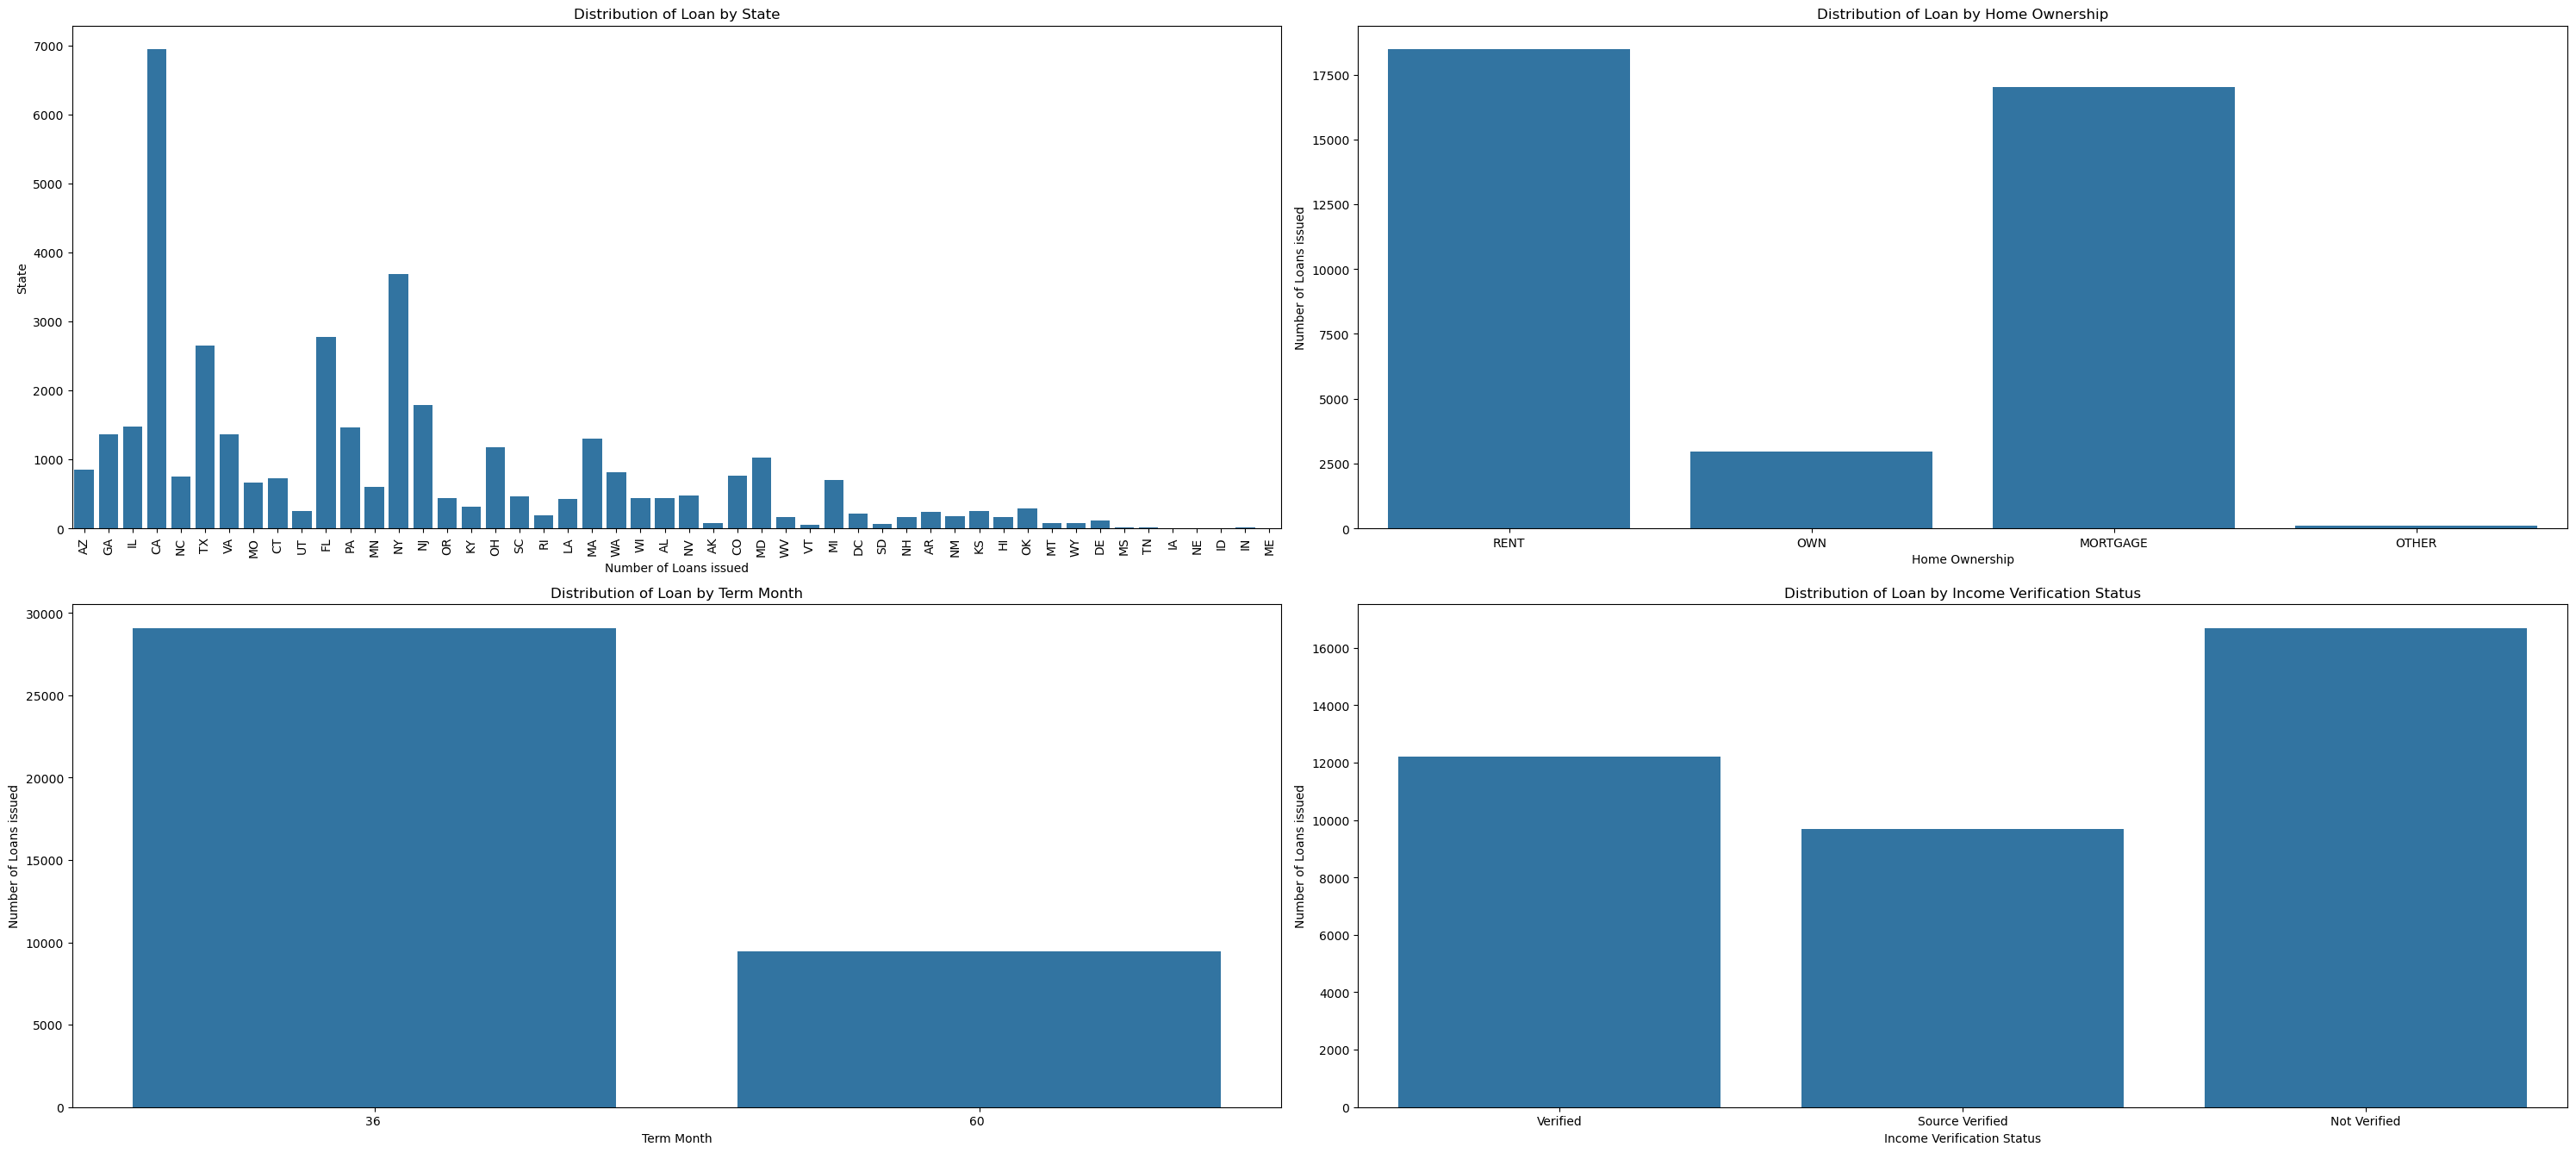

In [61]:
plt.figure(figsize=(30,20))
# Distribution of Loan by State
plt.subplot(3,2,3)
sns.countplot(x='addr_state', data=data)
plt.xticks(rotation=90)

plt.title('Distribution of Loan by State')
plt.xlabel("Number of Loans issued")
plt.ylabel("State")
# To rotate axis text
plt.xticks(rotation=90)

# Distribution of Loan by Home Ownership
plt.subplot(3,2,4)
sns.countplot(x='home_ownership', data=data)
plt.title('Distribution of Loan by Home Ownership')
plt.xlabel("Home Ownership")
plt.ylabel("Number of Loans issued")

# Distribution of Loan by Term Month
plt.subplot(3,2,5)
sns.countplot(x='term', data=data)
plt.title('Distribution of Loan by Term Month')
plt.xlabel("Term Month")
plt.ylabel("Number of Loans issued")

# Distribution of Loan by Income Verification Status
plt.subplot(3,2,6)
sns.countplot(x='verification_status', data=data)
plt.title('Distribution of Loan by Income Verification Status')
plt.xlabel("Income Verification Status")
plt.ylabel("Number of Loans issued")

# To adjust spacing between subplots
plt.tight_layout()
plt.show()



Observation:

From this dataset, we have more observations(85%) from "Fully Paid" status.

There are more loan applicant's with purpose of debt consolidation.

There are more loan applicant's from California state.

Most of the loan applicant's are rented and mortgage.

There the more number of loan with 36 month term.

There the more number of loan which were not verified the annual income.

Borrowers with own house and want to consolidate debt are not at much risk, but borrower with rent,mortgage and want to consolidate debt are at high risk applicants.

## Univariate Analysis on Ordered Categorical Variables

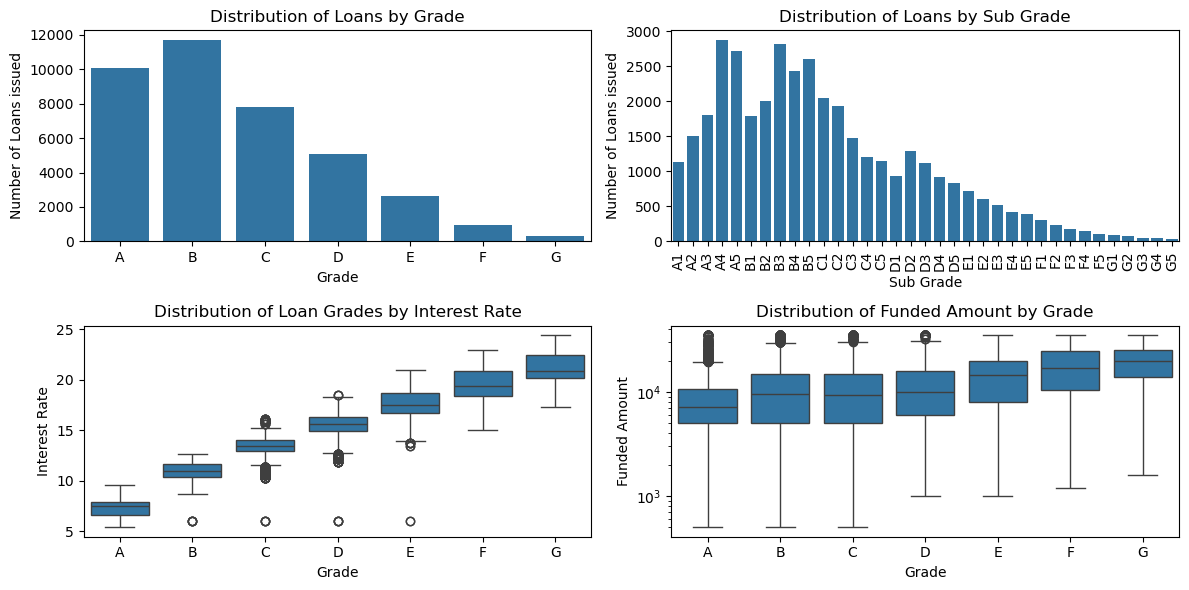

In [62]:
# Distribution of Loans by Grade and Sub-Grade
plt.figure(figsize=(12,6))

plt.figure(1)

plt.subplot(2,2,1)
sns.countplot( x="grade", data=data,order = np.sort(data['grade'].unique()))
plt.title("Distribution of Loans by Grade")
plt.xlabel("Grade")
plt.ylabel("Number of Loans issued")

plt.subplot(2,2,2)
sns.countplot( x="sub_grade", data=data, order = np.sort(data['sub_grade'].unique()))
plt.title("Distribution of Loans by Sub Grade")
plt.xlabel("Sub Grade")
plt.ylabel("Number of Loans issued")

# To rotate axis text
plt.xticks(rotation=90)


# Distribution of Loan Grades by Interest Rate
plt.subplot(2,2,3)
sns.boxplot(x="grade", y="int_rate", data=data, order = np.sort(data['grade'].unique()))
plt.title('Distribution of Loan Grades by Interest Rate')
plt.xlabel("Grade")
plt.ylabel("Interest Rate")


# Distribution of Funded Amount by Grade
plt.subplot(2,2,4)
sns.boxplot(x="grade", y="funded_amnt" , data=data , order = np.sort(data['grade'].unique()))
plt.title('Distribution of Funded Amount by Grade')
plt.xlabel("Grade")
plt.ylabel("Funded Amount")
plt.yscale('log')

# To adjust spacing between subplots
plt.tight_layout()

plt.show()

Observations:

From above plots, it shows that more number of loans were from B,A and C grade's and least from G grade.

From Sub grades A4, B3 have more number of loans.

From 3rd plot, it shows that A,B,C grade loans have less interest rate and E,F,G have high interest rate. From 1st, 2nd plots there are more number of loans from A,B,C grade(granularity check from sub-grades). It might be the reason that the loan applicant's from A,B,C grades have better credit score and lower risk.

From 4th plot, it shows that there are high funded amount in A,B,C and D grades as the applicant's from these grades have better credit score and lower risk.

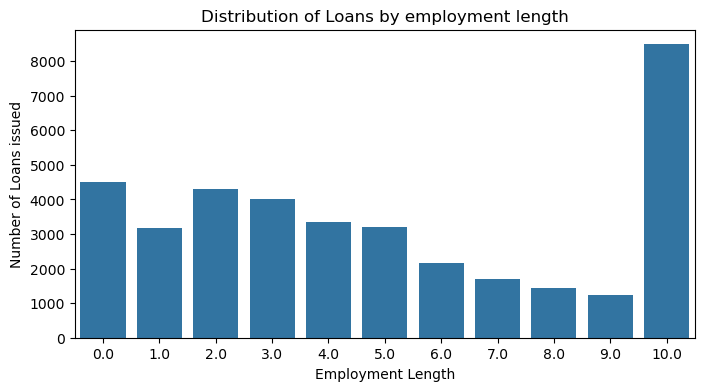

In [63]:
# Distribution of Loans by employment length
plt.figure(figsize=(8,4))
sns.countplot(x='emp_length', data=data)
plt.title('Distribution of Loans by employment length')
plt.xlabel("Employment Length")
plt.ylabel("Number of Loans issued")
plt.show()

Observation:

The majority of borrowers have been employed for at least 10 years.

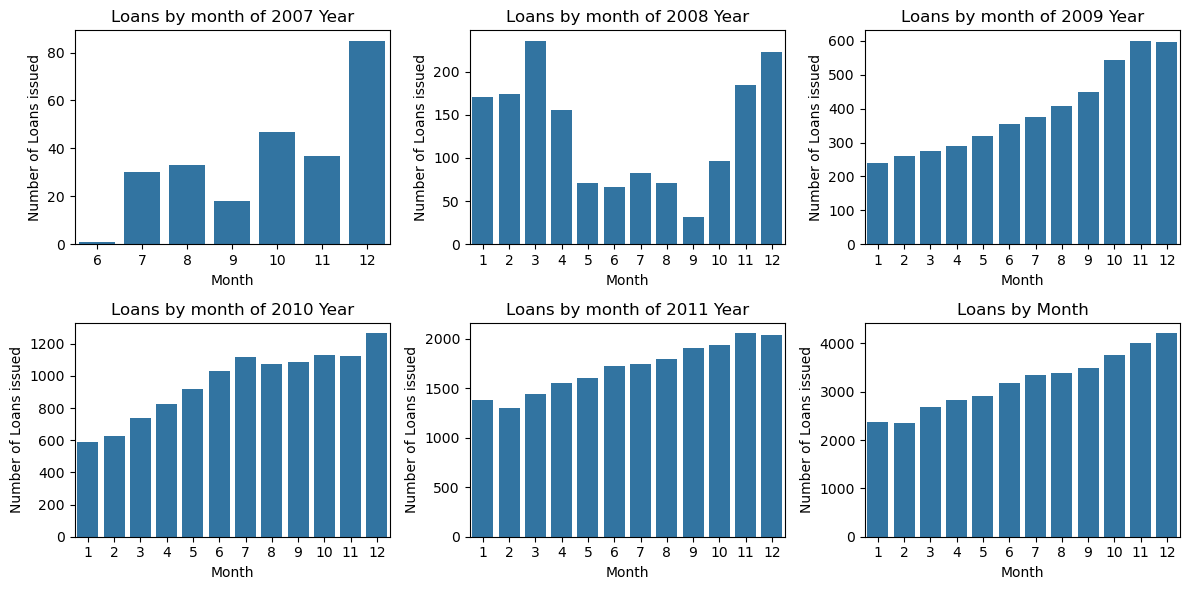

In [64]:
# Number of loans issued (by year/month)
plt.figure(figsize=(12,6))

plt.figure(1)

plt.subplot(2,3,1)
sns.countplot(x="issued_month", data=data[data['issue_year']==2007])
plt.title("Loans by month of 2007 Year")
plt.xlabel("Month")
plt.ylabel("Number of Loans issued")

plt.subplot(2,3,2)
sns.countplot( x="issued_month", data=data[data['issue_year']==2008])
plt.title("Loans by month of 2008 Year")
plt.xlabel("Month")
plt.ylabel("Number of Loans issued")

plt.subplot(2,3,3)
sns.countplot( x="issued_month", data=data[data['issue_year']==2009])
plt.title("Loans by month of 2009 Year")
plt.xlabel("Month")
plt.ylabel("Number of Loans issued")

plt.subplot(2,3,4)
sns.countplot( x="issued_month", data=data[data['issue_year']==2010])
plt.title("Loans by month of 2010 Year")
plt.xlabel("Month")
plt.ylabel("Number of Loans issued")

plt.subplot(2,3,5)

sns.countplot( x="issued_month", data=data[data['issue_year']==2011])
plt.title("Loans by month of 2011 Year")
plt.xlabel("Month")
plt.ylabel("Number of Loans issued")

plt.subplot(2,3,6)
sns.countplot( x="issued_month", data=data)
plt.title("Loans by Month")
plt.xlabel("Month")
plt.ylabel("Number of Loans issued")

# To adjust spacing between subplots
plt.tight_layout()
plt.show()

Observations:

From above plots, it shows that more number of loans were issued in 11,12(November, December) months, the reasons could be Festivals(Thanks giving Day, Christmas and New Year).

In 2008 Year, there was huge spike in 3rd Month.

Number of loans issued increased steadily with slight descrease in 2008 year.

## Univariate Analysis on Quantitative Variables


In [65]:
# Let's print descriptive data summary for all numerical columns
print (data[['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment','annual_inc', 'dti', 'delinq_2yrs','emp_length', 'roi']].describe())
print ("\n")
print (data[['inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util','total_acc',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int','total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
        'last_pymnt_amnt', 'application_type','pub_rec_bankruptcies', 'num_of_mnts_paid']].describe())

          loan_amnt   funded_amnt  funded_amnt_inv      int_rate  \
count  38561.000000  38561.000000     38561.000000  38561.000000   
mean   11047.019009  10783.942973     10222.833415     11.931173   
std     7347.682257   7089.407652      7022.152492      3.691412   
min      500.000000    500.000000         0.000000      5.420000   
25%     5300.000000   5200.000000      5000.000000      8.940000   
50%     9600.000000   9550.000000      8741.042410     11.710000   
75%    15000.000000  15000.000000     14000.000000     14.380000   
max    35000.000000  35000.000000     35000.000000     24.400000   

        installment    annual_inc           dti   delinq_2yrs    emp_length  \
count  38561.000000  3.856100e+04  38561.000000  38561.000000  37529.000000   
mean     322.458554  6.878709e+04     13.271920      0.146573      4.941299   
std      208.618464  6.422929e+04      6.673218      0.491936      3.557075   
min       15.690000  4.000000e+03      0.000000      0.000000      0.00

It seems all are fine except annual income(annual_inc). Let's analyse it separatly.



In [66]:
# It shows that the very high annual income exists after 75th percentile
data['annual_inc'].describe().apply(lambda x: format(x, 'f'))

count      38561.000000
mean       68787.090861
std        64229.287828
min         4000.000000
25%        40000.000000
50%        58880.000000
75%        82000.000000
max      6000000.000000
Name: annual_inc, dtype: object

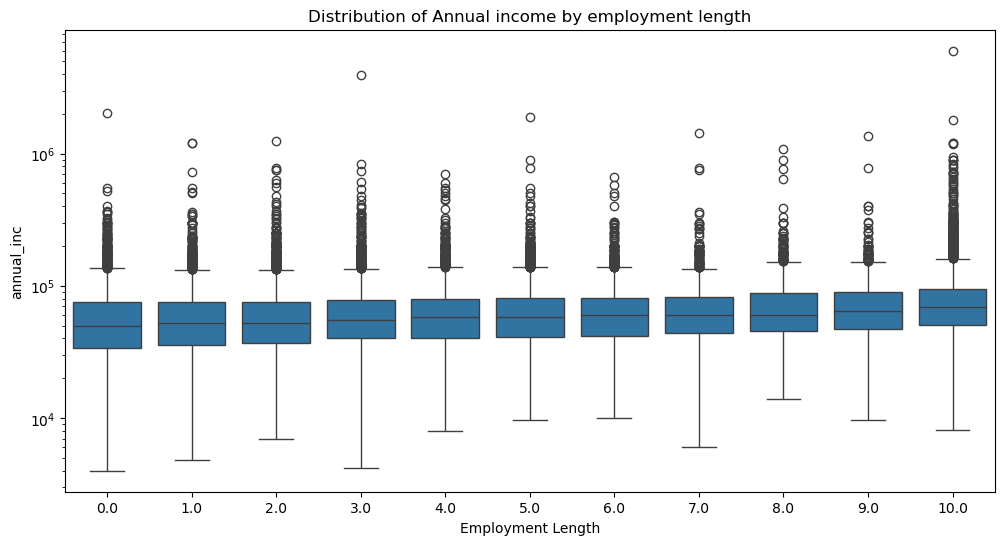

In [67]:
# Distribution of Annual income by employment length
plt.figure(figsize=(12,6))
sns.boxplot(x="emp_length", y="annual_inc" , data=data)
plt.title('Distribution of Annual income by employment length')
plt.xlabel("Employment Length")
plt.ylabel("annual_inc")
plt.yscale('log')
plt.show()

Observations:

Almost all 'employment length' category has same level of 25th, 50th(Median) and 75th precentile's.

It clearly shows that there are high annual income values in almost all 'employment length' category. We can treat these as outliers.

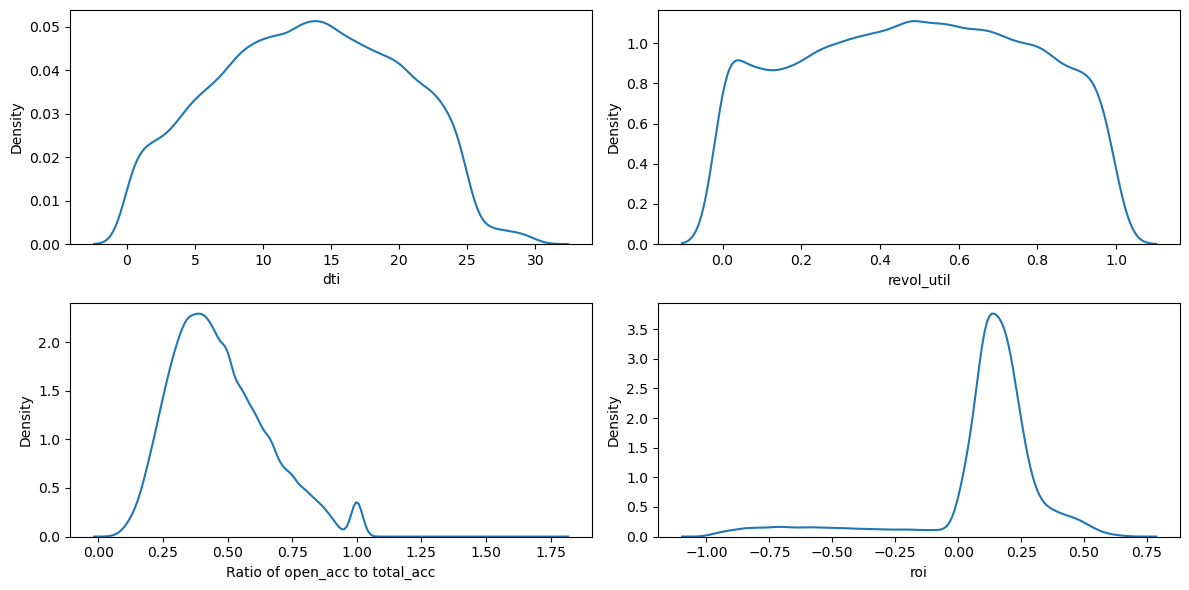

In [68]:
# Frequency distributions
plt.figure(figsize=(12,6))

plt.figure(1)

# Frequency distribution of DTI
plt.subplot(2,2,1)
sns.kdeplot(data["dti"])

# Frequency distribution of revolving credit uilization
plt.subplot(2,2,2)
sns.kdeplot(data["revol_util"])

# Frequency distribution of ration of open_acc to total_acc
plt.subplot(2,2,3)
sns.kdeplot(data["open_acc"]/data["total_acc"])
plt.xlabel("Ratio of open_acc to total_acc")

# Frequency distribution of ration of open_acc to total_acc
plt.subplot(2,2,4)
sns.kdeplot(data["roi"])


# To adjust spacing between subplots
plt.tight_layout()
plt.show()

Observations:

The average debt-to-income ratio is 13%. There doesn’t seem to be much skew, considering the median is so close to the mean.

The mean of revolving credit utilization is 49%, which means the average borrower is using most of their revolving credit at a time when they are seeking the loan. Also, there is large spread of data but not much skewed.

The percentage of open accounts to total accounts seems left skewed.

Negative ROI indicates defaulted loans while almost all of the loans with positive ROI were fully paid.

Summary of Univariate Observations:
There are 40 variables (so far) with 39717 rows.

Number of loans issued increased steadily by every year with a slight decrease in 2008.

Of settled loans, 83% were Fully Paid and 14% were Charged Off.

Borrowers with own house and want to consolidate debt are not at much risk, but borrower with rent,mortgage and want to consolidate debt are at high risk applicants.

Majority of loans were from A, B, and C grade.

There is an inverse relationship between interest rate and loan grade - lower grades have higher interest rate.

## Bivariate Analysis on Continuous Variables


In [69]:
data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,application_type,pub_rec_bankruptcies,num_of_mnts_paid,issued_month,issue_year,roi
0,5000,5000,4975.0,36,10.65,162.87,B,B2,10.0,RENT,...,0.00,0.00,2015-01-01,171.62,INDIVIDUAL,0.0,36,12,2011,0.17
1,2500,2500,2500.0,60,15.27,59.83,C,C4,0.0,RENT,...,117.08,1.11,2013-04-01,119.66,INDIVIDUAL,0.0,17,12,2011,-0.60
2,2400,2400,2400.0,36,15.96,84.33,C,C5,10.0,RENT,...,0.00,0.00,2014-06-01,649.91,INDIVIDUAL,0.0,36,12,2011,0.25
3,10000,10000,10000.0,36,13.49,339.31,C,C1,10.0,RENT,...,0.00,0.00,2015-01-01,357.48,INDIVIDUAL,0.0,36,12,2011,0.22
5,5000,5000,5000.0,36,7.90,156.46,A,A4,3.0,RENT,...,0.00,0.00,2015-01-01,161.03,INDIVIDUAL,0.0,36,12,2011,0.13


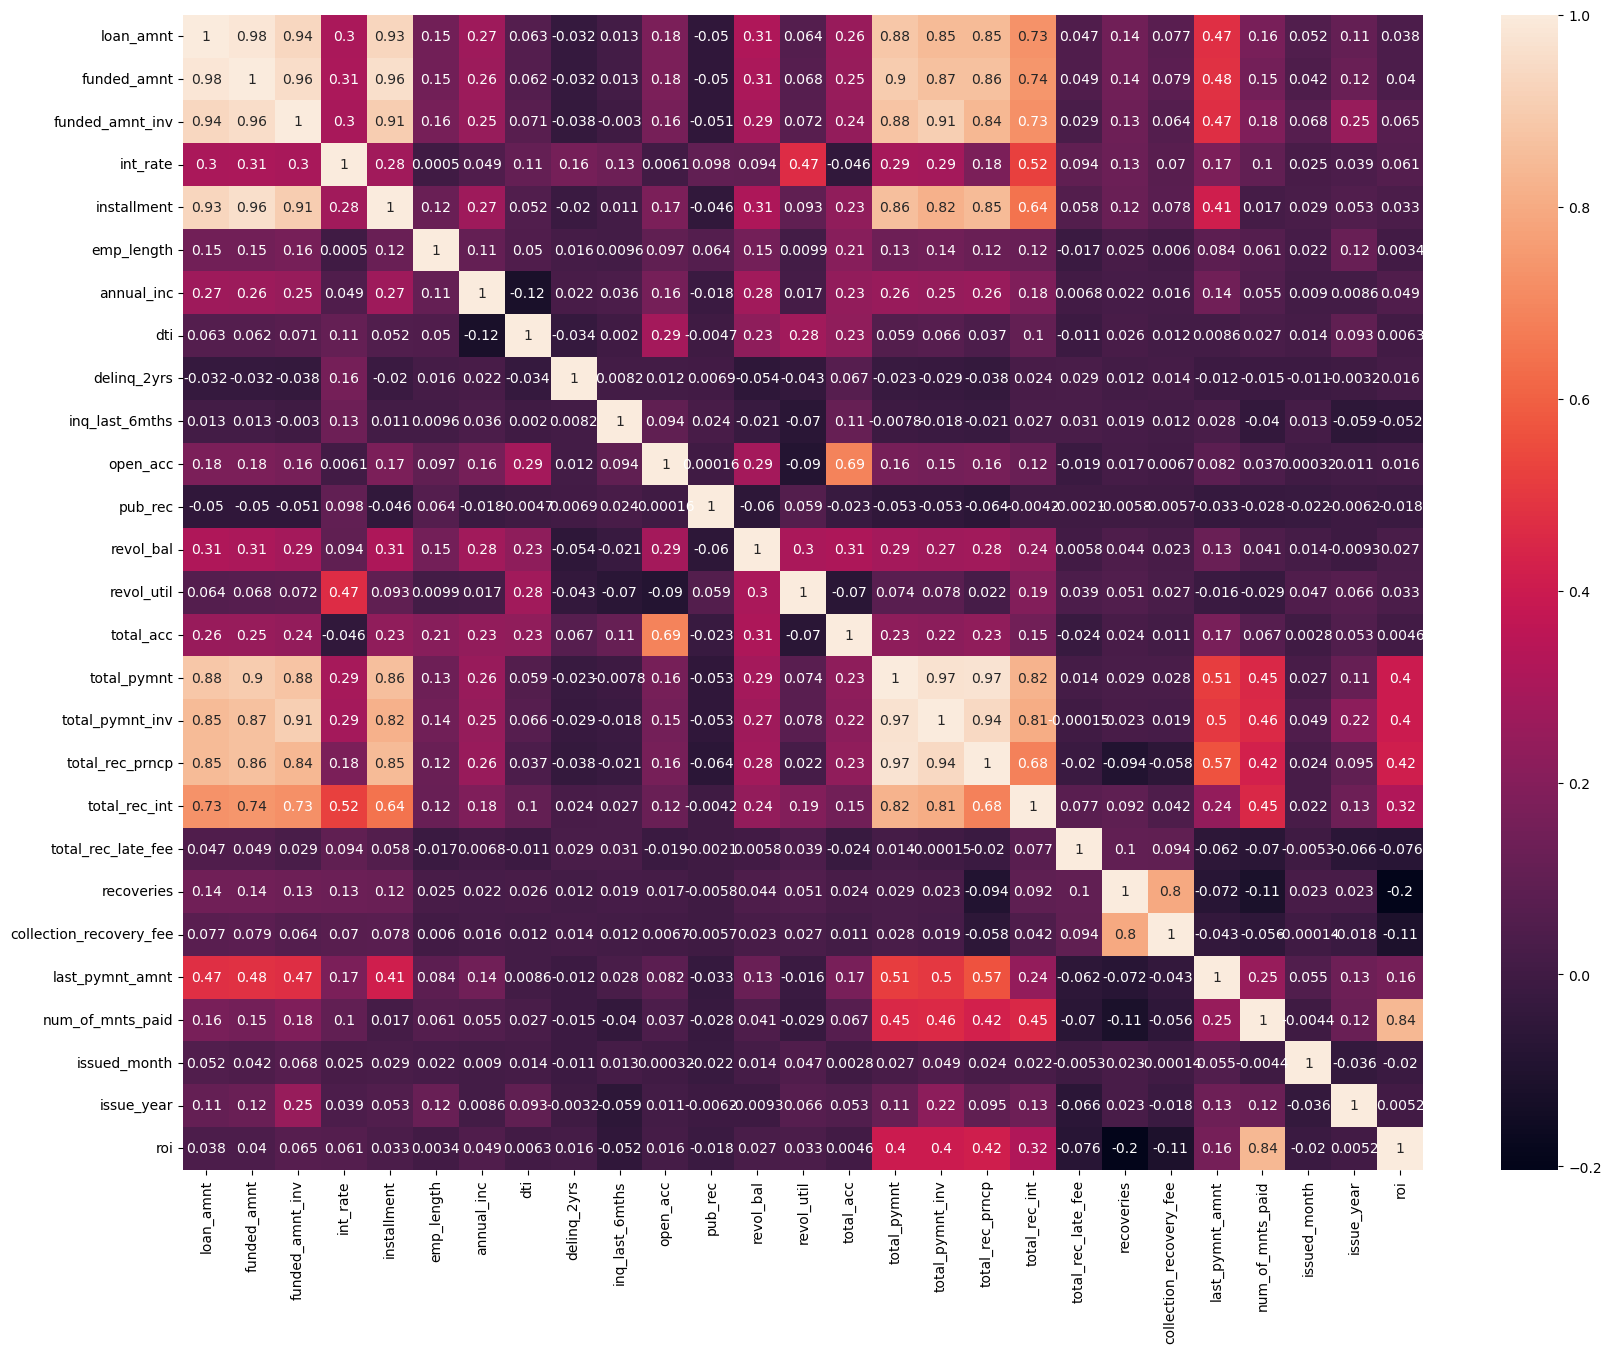

In [70]:
# Correlation Plot
co = data.corr(numeric_only=True)
round(co,3)
plt.figure(figsize=(20,15))
sns.heatmap(co, annot=True)
plt.show()


From above correlation plot it show:

There are no highly negative correlation between columns.

There are some highly correlated columns at top and middle left block.

There is 0.45 correlation between term_months and interest rate(int_rate).

There is 0.47 correlation between revol_util and interest rate(int_rate).

There is no much correlation between Annual Income, DTI with other columns.

Let's check the bivariate distribution for below columns:

Interest rates vs ROI
Annual income vs ROI

<Figure size 1200x600 with 0 Axes>

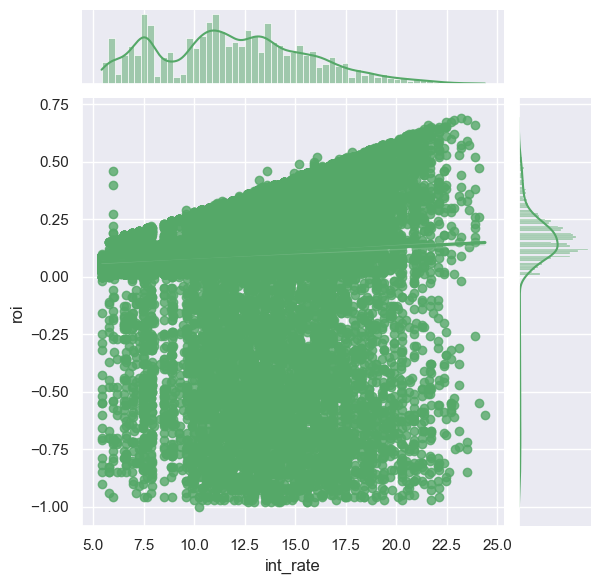

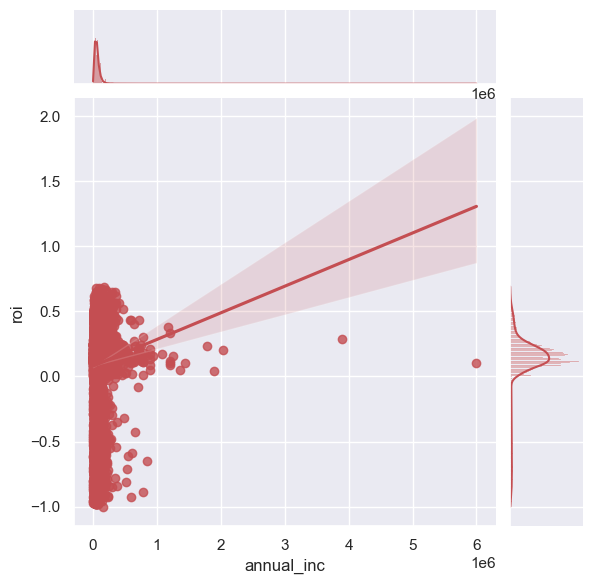

In [71]:
# ROI vs Interest Rate and Annual Income
plt.figure(figsize=(12,6))

sns.set(style="darkgrid", color_codes=True)

sns.jointplot(x="int_rate", y="roi", data=data, kind="reg", color="g")

sns.jointplot(x="annual_inc", y="roi", data=data, kind="reg", color="r")

plt.show()

Observations:

There was a positive correlation between interest rates and ROI for borrowers who paid their loans, but for those who didn’t pay the ROI was negative and it shows no correlation with interest rates.

Borrowers with higher income has positive ROI while borrowers with lower income has negative ROI.

<Figure size 2000x1500 with 0 Axes>

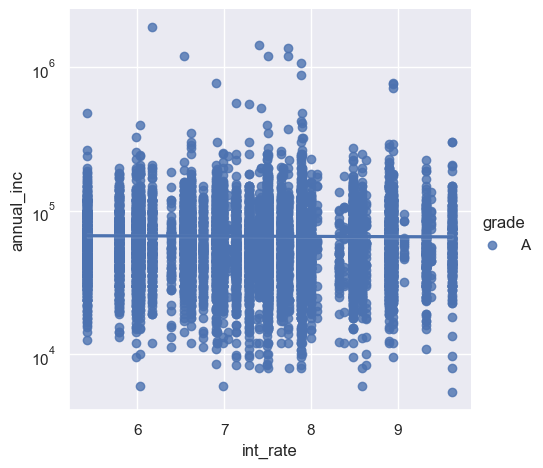

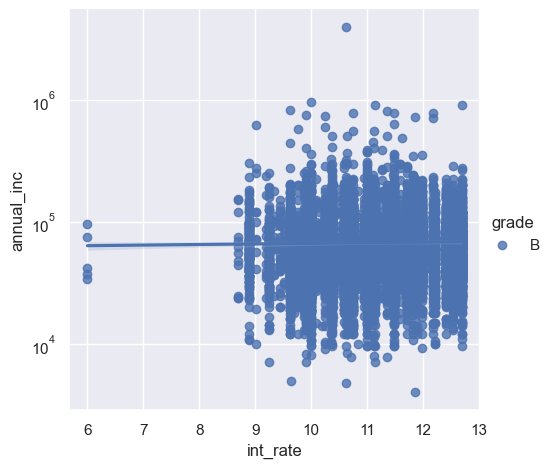

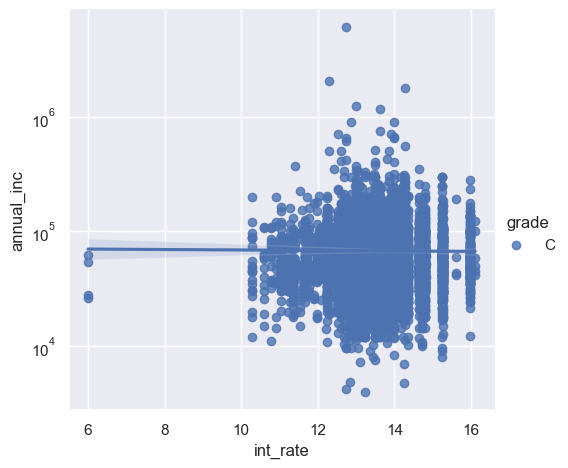

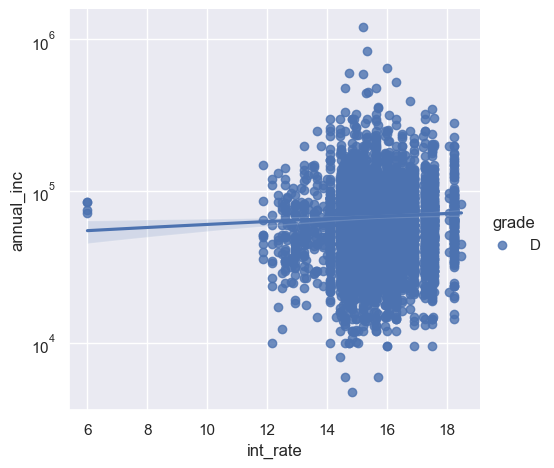

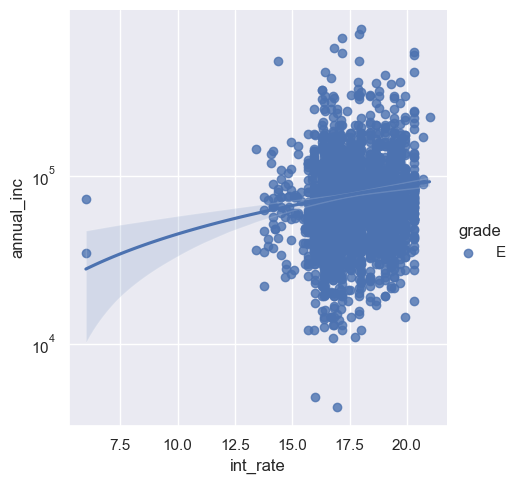

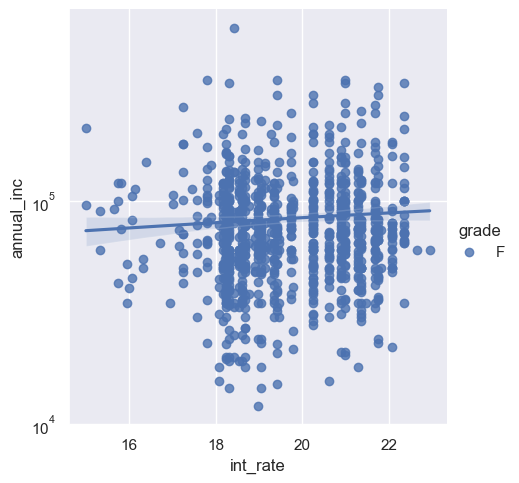

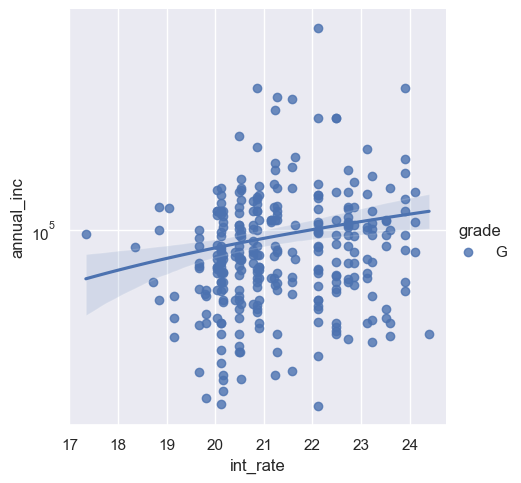

In [72]:
# Annual Income Vs Interest Rate distribution by each grade
plt.figure(figsize=(20,15))

sns.lmplot( x="int_rate", y="annual_inc", data=data[data['grade']=='A'], hue='grade')
plt.yscale('log')


sns.lmplot( x="int_rate", y="annual_inc", data=data[data['grade']=='B'], hue='grade')
plt.yscale('log')


sns.lmplot( x="int_rate", y="annual_inc", data=data[data['grade']=='C'], hue='grade')
plt.yscale('log')


sns.lmplot( x="int_rate", y="annual_inc", data=data[data['grade']=='D'], hue='grade')
plt.yscale('log')

sns.lmplot( x="int_rate", y="annual_inc", data=data[data['grade']=='E'], hue='grade')
plt.yscale('log')

sns.lmplot( x="int_rate", y="annual_inc", data=data[data['grade']=='F'], hue='grade')
plt.yscale('log')

sns.lmplot( x="int_rate", y="annual_inc", data=data[data['grade']=='G'], hue='grade')
plt.yscale('log')

plt.show()

Observations:

Grade A has borrowers with interest rate between 5-10%.

Grade B has borrowers with interest rate between 8-13%, but few are there with near 6%.

Grade C has borrowers with interest rate between 10-16%, but few are there with near 6%.

Grade D has borrowers with interest rate between 12-18%, but few are there with near 6%.

Grade E has borrowers with interest rate between 14-20%, but few are there with near 6%.

Grade F has borrowers with interest rate between 15-23%.

Grade G has borrowers with interest rate between 17-24%.

It is evident that the interest rate range changes from one grade to other, and also there are few borrowers with near 6% falling in B,C,D and E grade's.

<Figure size 1500x1000 with 0 Axes>

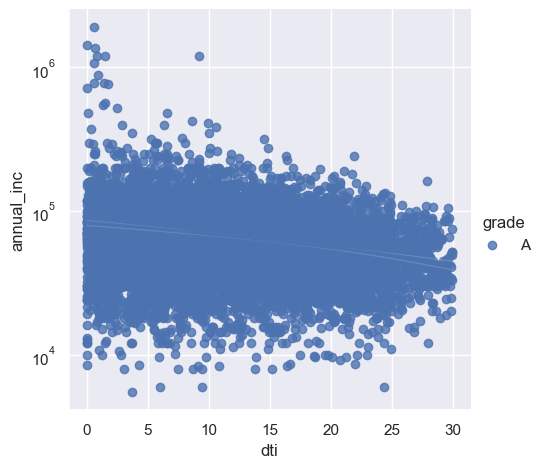

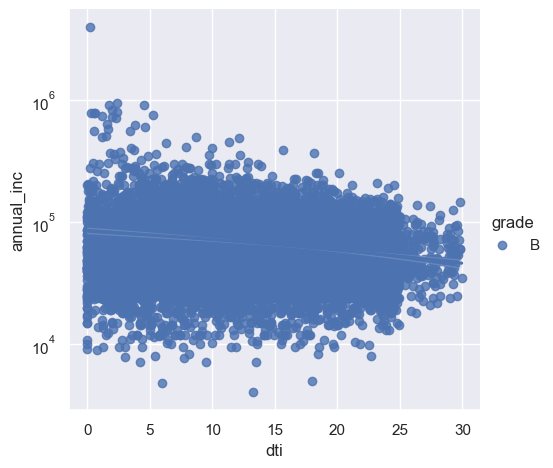

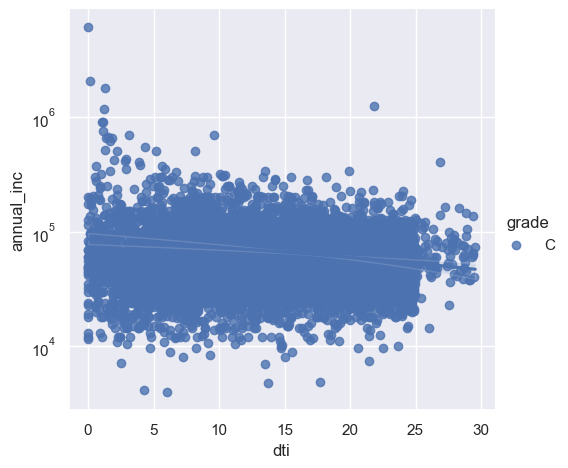

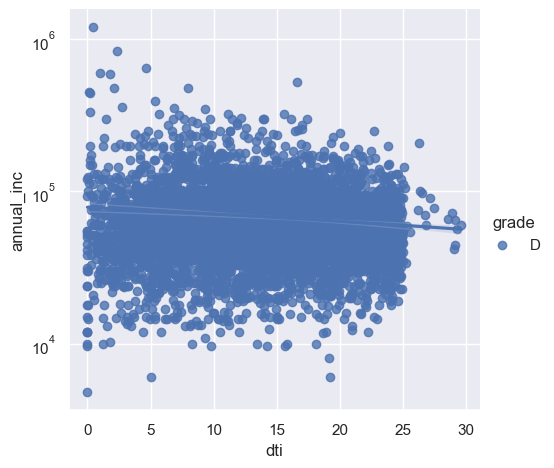

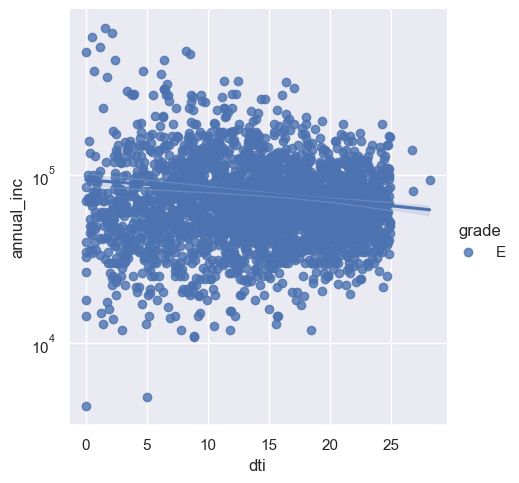

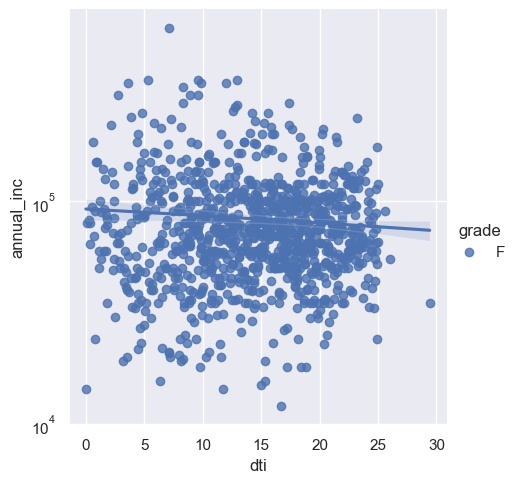

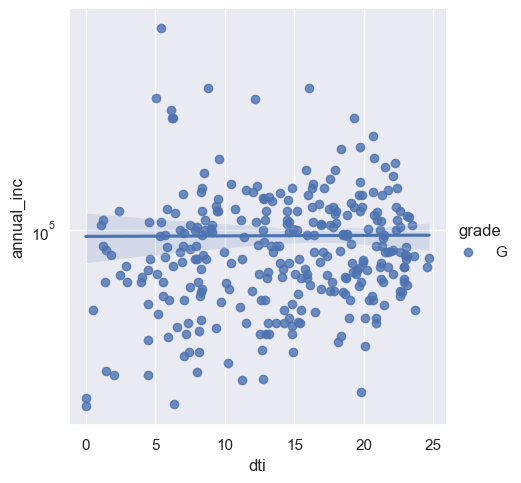

In [73]:
# Annual Income Vs DTI distribution by each grade
plt.figure(figsize=(15,10))

sns.lmplot( x="dti", y="annual_inc", data=data[data['grade']=='A'], hue='grade')
plt.yscale('log')


sns.lmplot( x="dti", y="annual_inc", data=data[data['grade']=='B'], hue='grade')
plt.yscale('log')


sns.lmplot( x="dti", y="annual_inc", data=data[data['grade']=='C'], hue='grade')
plt.yscale('log')


sns.lmplot( x="dti", y="annual_inc", data=data[data['grade']=='D'], hue='grade')
plt.yscale('log')

sns.lmplot( x="dti", y="annual_inc", data=data[data['grade']=='E'], hue='grade')
plt.yscale('log')

sns.lmplot( x="dti", y="annual_inc", data=data[data['grade']=='F'], hue='grade')
plt.yscale('log')

sns.lmplot( x="dti", y="annual_inc", data=data[data['grade']=='G'], hue='grade')
plt.yscale('log')

plt.show()


Observations:

It seems in A,B,C grades the data is spreaded and have DTI from 0-30.

Lower number of borrowers from 25-30 DTI in D,E grades.

Grade G has maximum 25 DTI.

It seems there is no DTI range constraint from one grade to other similar to interest rate which we have seen above.

## Bivariate Analysis on Categorical Variables


### ROI Bivariate Distribution plots


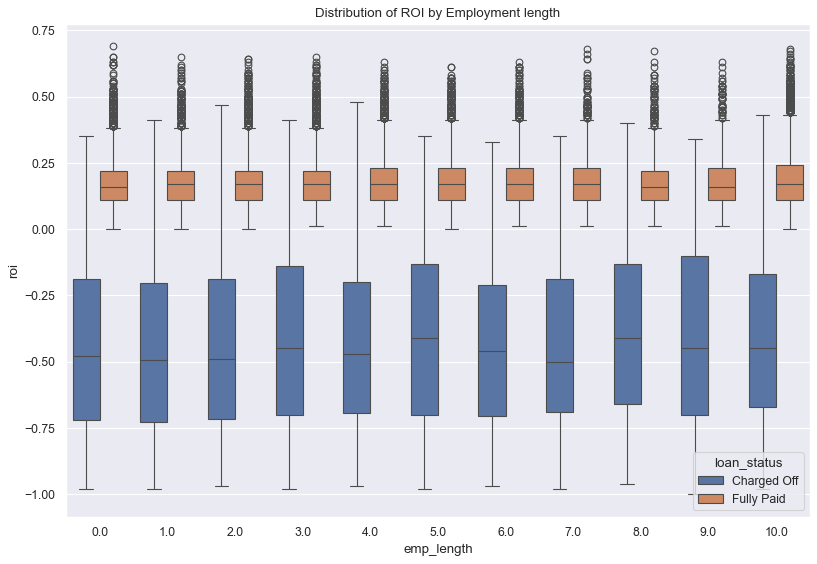

In [74]:
# ROI vs Employment length by loan_status
plt.figure(num=None, figsize=(12,8), dpi=80, facecolor='w', edgecolor='k')
sns.boxplot(x="emp_length", y='roi', hue='loan_status',  data=data)
plt.title('Distribution of ROI by Employment length')
plt.show()

Observations:

From fully_paid status loan, almost all employment length have same mean ROI.

From Charged_off status loan 1 years, 2 years and 7 years have low mean ROI.

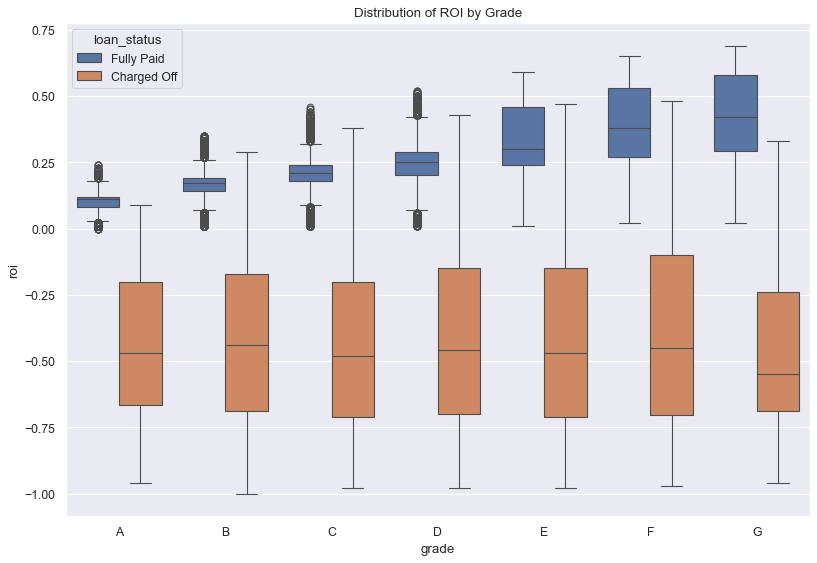

In [75]:
# ROI vs Grade by loan_status
plt.figure(num=None, figsize=(12,8), dpi=80, facecolor='w', edgecolor='k')
sns.boxplot(x="grade", y="roi" ,hue='loan_status', data=data, order = np.sort(data['grade'].unique()))
plt.title('Distribution of ROI by Grade')
plt.show()

Observations:

From fully_paid status loan, grades E,F,G have high mean ROI, this might be high interest rates.

From Charged_off status loan, grade G has low mean ROI.

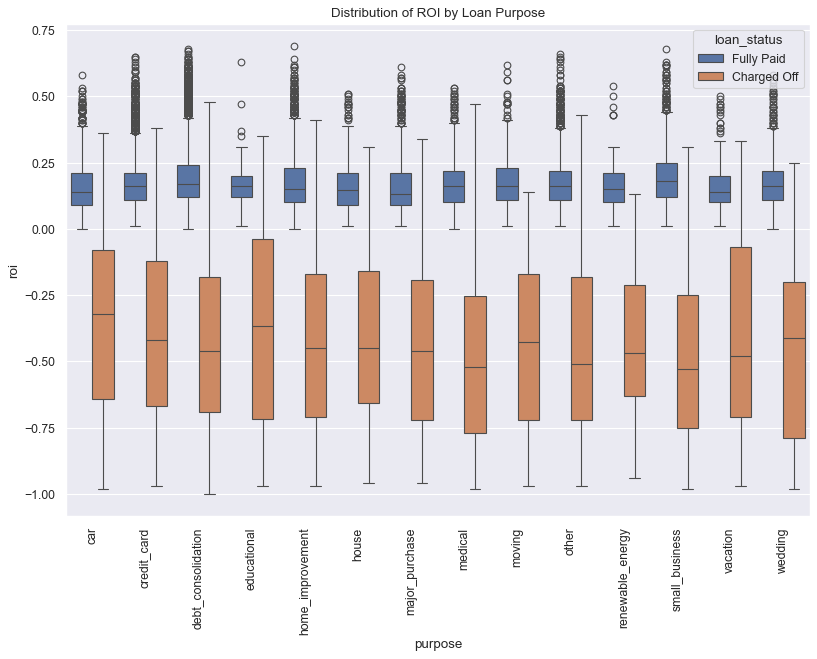

In [76]:
# ROI vs Loan Purpose by loan_status
plt.figure(num=None, figsize=(12,8), dpi=80, facecolor='w', edgecolor='k')
sns.boxplot(x="purpose", y='roi', hue='loan_status', data=data, order=np.sort(data['purpose'].unique()))
plt.title('Distribution of ROI by Loan Purpose')
# To rotate axis text
plt.xticks(rotation=90)
plt.show()

Observations:

From fully_paid status loan, almost all categories have nearby mean ROI.

From Charged_off status loan, small_business, other and medical have low mean ROI.

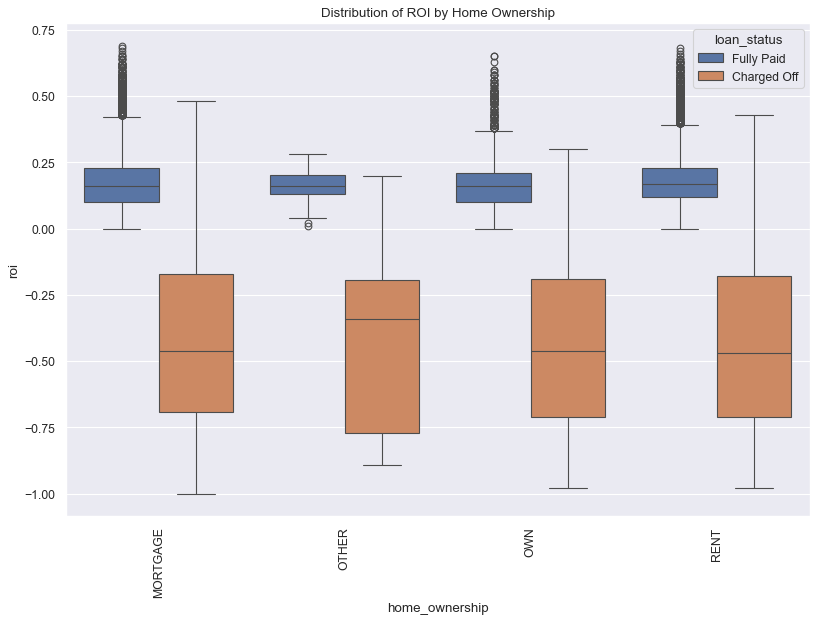

In [77]:
# ROI vs Home Ownership by loan_status
plt.figure(num=None, figsize=(12,8), dpi=80, facecolor='w', edgecolor='k')
sns.boxplot(x="home_ownership", y='roi', hue='loan_status', data=data, order=np.sort(data['home_ownership'].unique()))
plt.title('Distribution of ROI by Home Ownership')
# To rotate axis text
plt.xticks(rotation=90)
plt.show()

Observations: From Charged_off status loan, Rent and Mortgage have low mean ROI.



## Interest Rate Bivariate Distribution Plots


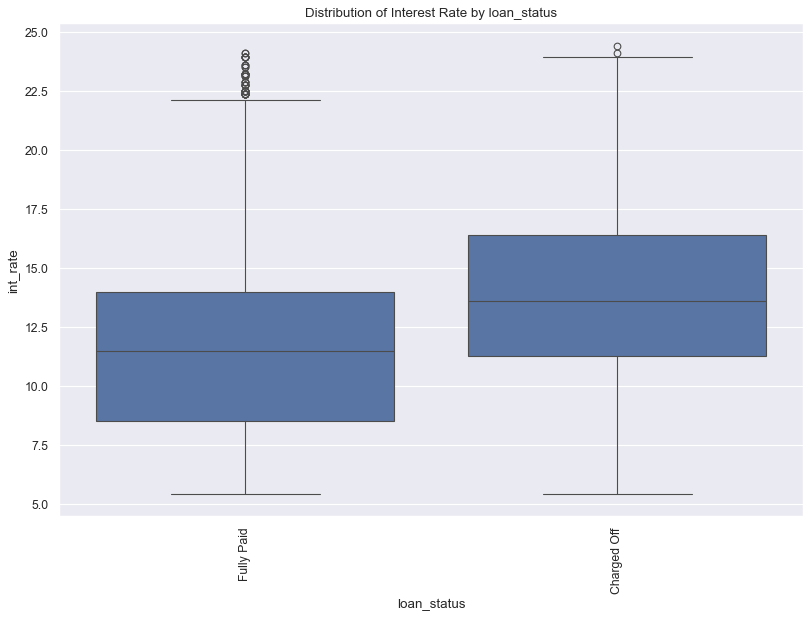

In [78]:
# Interest Rate vs loan_status
plt.figure(num=None, figsize=(12,8), dpi=80, facecolor='w', edgecolor='k')
sns.boxplot(x="loan_status", y='int_rate', data=data)
plt.title('Distribution of Interest Rate by loan_status')
# To rotate axis text
plt.xticks(rotation=90)
plt.show()

Observations: It shows that the interest rate is more from defaulters.



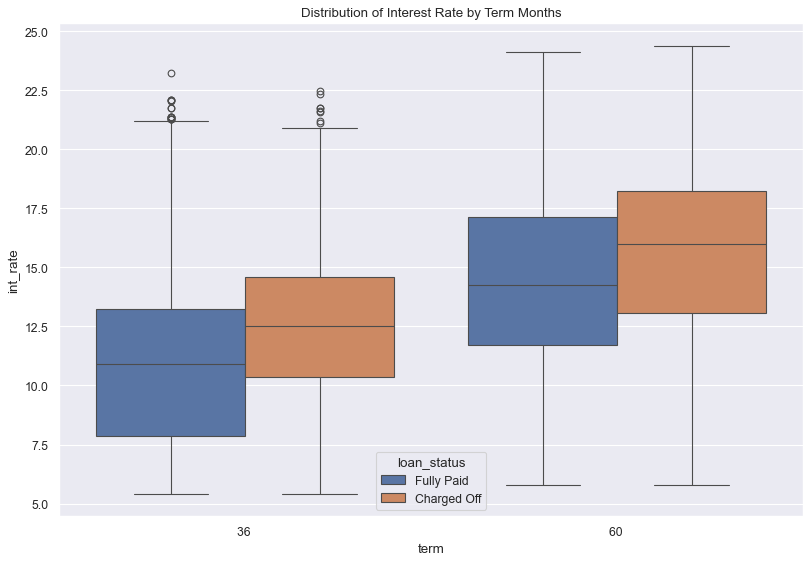

In [79]:
# Interest Rate vs Term Months by loan_status
plt.figure(num=None, figsize=(12,8), dpi=80, facecolor='w', edgecolor='k')
sns.boxplot(x="term", y='int_rate', hue='loan_status',  data=data)
plt.title('Distribution of Interest Rate by Term Months')
plt.show()

Observations:

It is evident that 60 months term loans have more interest rate.

There are more defaulters in both 36, 60 month terms because of high interest rates.

## DTI Bivariate Distribution Plots


Observations:

DTI is less in lower segment, as the annual income is less and they might not have any loans and hence less DTI. If we have age details then we can predict more with borrower’s age, income and employment length.

DTI is high in lower middle and middle segments.

DTI is less in upper middle and upper segments, as the income is high they might have financial freedom. Note that there are some borrower’s in upper segment who have DTI more than 25.


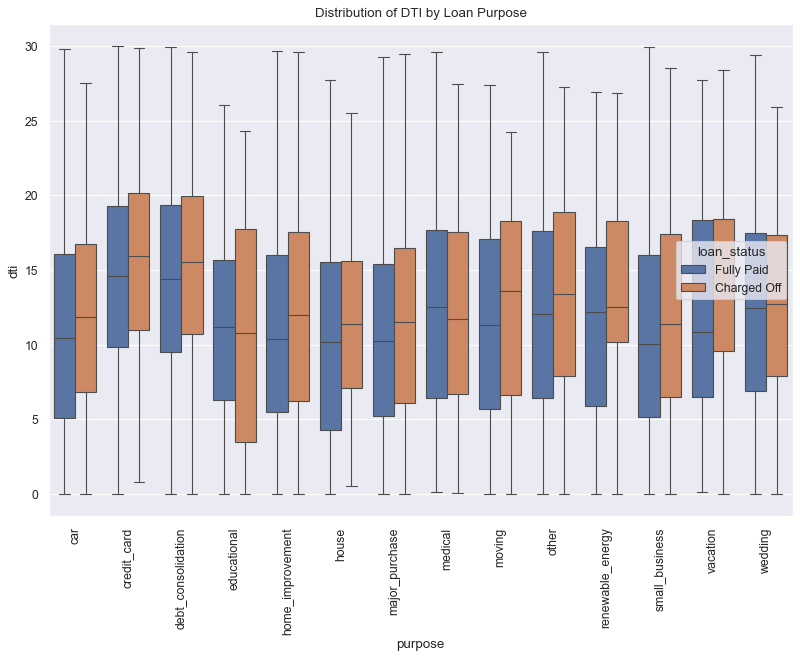

In [80]:
# DTI vs Loan Purpose by loan_status
plt.figure(num=None, figsize=(12,8), dpi=80, facecolor='w', edgecolor='k')
sns.boxplot(x="purpose", y='dti', hue='loan_status', data=data, order=np.sort(data['purpose'].unique()))
plt.title('Distribution of DTI by Loan Purpose')
# To rotate axis text
plt.xticks(rotation=90)
plt.show()

Observations: Almost in all categories of purpose, defaulter's DTI is high than fully paid borrowers.



## Loan Defaulters Analysis


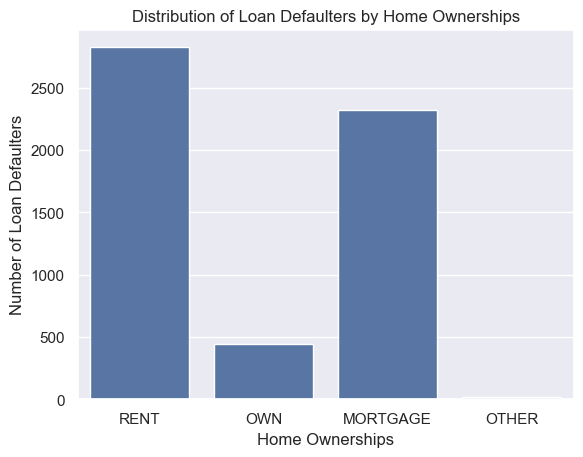

home_ownership
MORTGAGE    2325
OTHER         18
OWN          441
RENT        2827
Name: home_ownership, dtype: int64


In [81]:
# Distribution of Loan Defaulters by Home Ownerships
sns.countplot(x='home_ownership',  data=data[data['loan_status']=='Charged Off'])
plt.title('Distribution of Loan Defaulters by Home Ownerships')
plt.xlabel("Home Ownerships")
plt.ylabel("Number of Loan Defaulters")
plt.show()

print (data[data['loan_status']=='Charged Off'].groupby(['home_ownership'])['home_ownership'].count())

Observation: It shows there are more defaulters in RENT and MORTGAGE. let's check it in granular level.



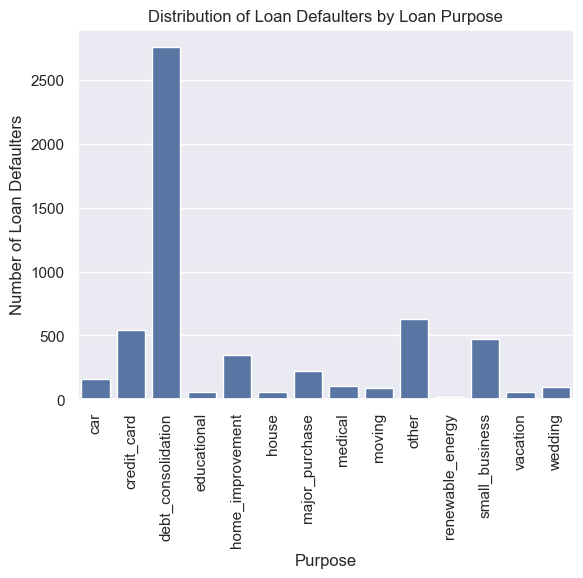

purpose
car                    160
credit_card            542
debt_consolidation    2757
educational             56
home_improvement       345
house                   59
major_purchase         222
medical                106
moving                  92
other                  632
renewable_energy        19
small_business         473
vacation                53
wedding                 95
Name: purpose, dtype: int64


In [82]:
#Distribution of Loan Defaulters by Loan Purpose
sns.countplot(x='purpose',  data=data[data['loan_status']=='Charged Off'], order=np.sort(data['purpose'].unique()))
plt.title('Distribution of Loan Defaulters by Loan Purpose')
plt.xlabel("Purpose")
plt.ylabel("Number of Loan Defaulters")
# To rotate axis text
plt.xticks(rotation=90)
plt.show()


print (data[data['loan_status']=='Charged Off'].groupby(['purpose'])['purpose'].count())

Observation:

There are more defaulters from 'debt_consolidation','other', 'credit_card' and 'small_business'. Let's check this at granular level by combining with Home Ownership and by each Grade.

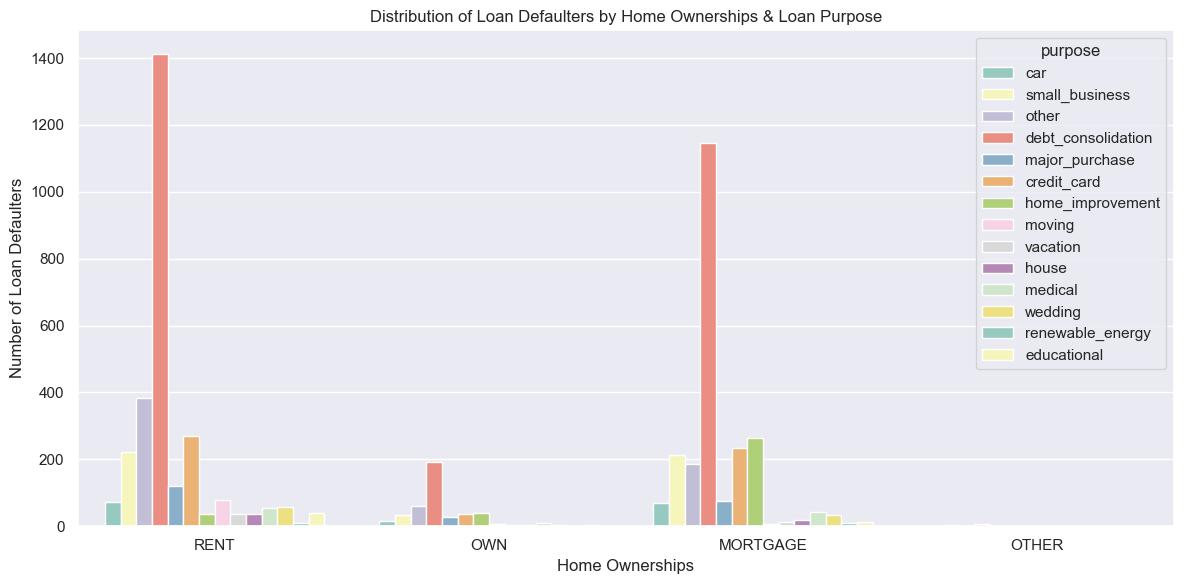

home_ownership  purpose           
MORTGAGE        car                     70
                credit_card            234
                debt_consolidation    1145
                educational             12
                home_improvement       265
                house                   19
                major_purchase          75
                medical                 42
                moving                   8
                other                  187
                renewable_energy         9
                small_business         213
                vacation                13
                wedding                 33
OTHER           car                      1
                credit_card              2
                debt_consolidation       7
                home_improvement         1
                moving                   1
                other                    2
                small_business           4
OWN             car                     15
                cre

In [83]:
# Distribution of Loan Defaulters by Home Ownerships & Loan Purpose
plt.figure(figsize=(12,6))
sns.countplot(x='home_ownership', hue='purpose', data=data[data['loan_status']=='Charged Off'], palette="Set3")

plt.title('Distribution of Loan Defaulters by Home Ownerships & Loan Purpose')
plt.xlabel("Home Ownerships")
plt.ylabel("Number of Loan Defaulters")
plt.tight_layout()
plt.show()

print (data[data['loan_status']=='Charged Off'].groupby(['home_ownership','purpose'])['home_ownership'].count())

Observation:

From RENT category, there are more defaulters from 'debt_consolidation','other', 'credit_card' and 'small_business'.

From MORTGAGE category, there are more defaulters from 'debt_consolidation','home_improvement', 'credit_card' and 'small_business'.

Overall, one should be carefull with 'debt_consolidation', 'credit_card' and 'small_business' loans when the borrowers dont have own house.

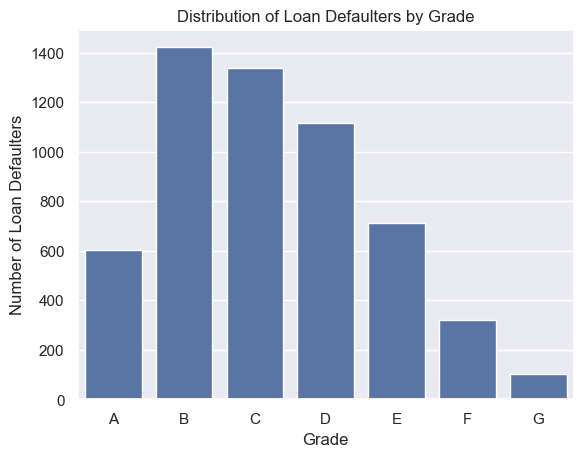

grade
A     602
B    1422
C    1339
D    1116
E     712
F     319
G     101
Name: grade, dtype: int64


In [84]:
#Distribution of Loan Defaulters by Grade
sns.countplot(x='grade',  data=data[data['loan_status']=='Charged Off'], order=np.sort(data['grade'].unique()))
plt.title('Distribution of Loan Defaulters by Grade')
plt.xlabel("Grade")
plt.ylabel("Number of Loan Defaulters")
plt.show()

print (data[data['loan_status']=='Charged Off'].groupby(['grade'])['grade'].count())

Observation:

It shows there are more defaulters in B,C and D grades.

Grades F,G(more intereste rate grades) are having less defaulters which is a good indicator.

Let's check it in granular level.

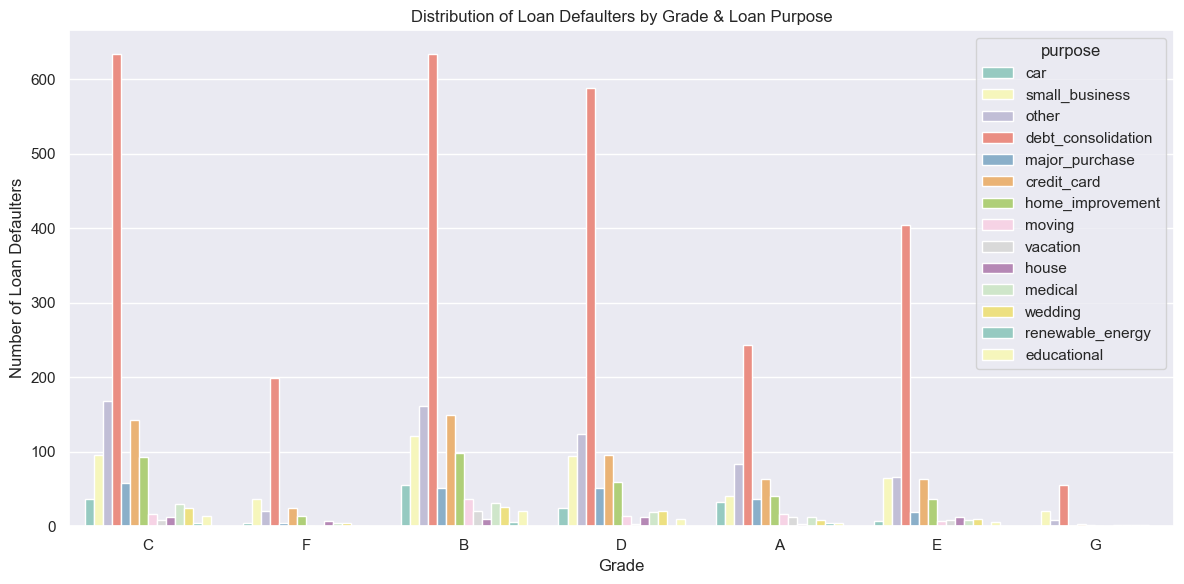

grade  purpose           
A      car                    32
       credit_card            63
       debt_consolidation    243
       educational             5
       home_improvement       41
                            ... 
G      moving                  1
       other                   9
       renewable_energy        2
       small_business         21
       wedding                 2
Name: grade, Length: 93, dtype: int64


In [85]:
# Distribution of Loan Defaulters by Grade & Loan Purpose
plt.figure(figsize=(12,6))
sns.countplot(x='grade', hue='purpose', data=data[data['loan_status']=='Charged Off'], palette="Set3")

plt.title('Distribution of Loan Defaulters by Grade & Loan Purpose')
plt.xlabel("Grade")
plt.ylabel("Number of Loan Defaulters")
plt.tight_layout()
plt.show()

print (data[data['loan_status']=='Charged Off'].groupby(['grade','purpose'])['grade'].count())

Observation:

From all grades, there are more defaulters from 'debt_consolidation', 'others', 'credit_card' and 'small_business' purpose loans.

# Summary of Bivariate Observations:
## Bivariate Analysis on Continuous Variables:
### Correlation Plot:
a) There were no highly negative correlation between numerical columns.

b) 0.45 correlation between term_months and interest rate(int_rate).

c) 0.47 correlation between revol_util and interest rate(int_rate).

d) No much correlation between Annual Income, DTI with other numerical columns.

### ROI vs Interest rates and Annual income:
a) There was a positive correlation between interest rates and ROI for borrowers who paid their loans, but for those who didn’t pay the ROI was negative and it shows no correlation with interest rates.

b) Borrowers with higher income has positive ROI while borrowers with lower income has negative ROI.
Annual Income Vs Interest Rate by each grade:

By charts, it is evident that the interest rate range changes from one grade to other, and also there are few borrowers with near 6% falling in B,C,D and E grade's.se loans.. segment, theove.

### Annual Income Vs DTI distribution by each grade:
By charts, it shows there is no DTI range constraint from one grade to other similar to interest rate which we have seen above.



# Bivariate Analysis on Categorical Variables:
### ROI Bivariate Distribution plots:
ROI vs Grade by loan_status: From fully_paid loan, grades E,F,G have high mean ROI, this is because of high interest rates.

### ROI vs Loan Purpose by loan_status: 
a) From fully_paid loans, almost all categories have nearby mean ROI. b) From Charged_off loan, small_business, other and medical have low mean ROI.

### ROI vs Home Ownership by loan_status:
From Charged_off loans, Rent and Mortgage have low mean ROI.

### ROI vs Income Segment by loan_status: 
a) From fully_paid loans, ROI is bit high for upper middle and upper Income_segment. b) From Charged_off loan, ROI is very low for lower Income_segment.

## Interest Rate Bivariate Distribution Plots:
### Interest Rate vs Term Months by loan_status:
a) It is evident that 60 months term loans have more interest rate.
b) There are more defaulters in both 36, 60 month terms because of high interest rates.

### Interest Rate vs Income Segment by loan_status: 
a) By charts, it shows that, at every income segment, the defaulters are due to high interest rates.

## DTI Bivariate Distribution Plots:
### DTI vs Income Segment by loan_status: 
a) DTI is less in lower segment, as the annual income is less and they might not have any loans and hence less DTI. If we have age details then we can predict more with borrower’s age, income and employment length.
b) DTI is high in lower middle and middle segments.
c) DTI is less in upper middle and upper segments, as the income is high they might have financial freedom. Note that there are some borrower’s in upper segment who have DTI more than 25.



## Loan Defaulters Analysis:
### Distribution of Loan Defaulters by Loan Purpose: 
a) There are more defaulters from 'debt_consolidation','other', 'credit_card' and 'small_business'. Let's check this at granular level by combining with Home Ownership and by each Grade.

### Distribution of Loan Defaulters by Home Ownerships:
a) By charts, it shows there are more defaulters in RENT and MORTGAGE.

### Distribution of Loan Defaulters by Home Ownerships & Loan Purpose: 
a) There are more defaulters with 'debt_consolidation', 'credit_card' and 'small_business' purpose from Rent, Mortgage category and hence, should be carefull when borrowers don't have own house.

### Distribution of Loan Defaulters by Grade:
a) By charts, it shows there are more defaulters in B,C and D grades. 
b) Grades F,G(more intereste rate grades) are having less defaulters which is a good indicator.

### Distribution of Loan Defaulters by Grade & Loan Purpose: 
By charts, from all grades, there are more defaulters from 'debt_consolidation', 'others', 'credit_card' and 'small_business' purpose loans.






# Conclusion:

Number of loans issued increased steadily by every year with a slight decrease in 2008.

Of settled loans, 83% were Fully Paid and 14% were Charged Off.

Borrowers with own house and the purpose of loan with consolidate debt, 'credit_card' and 'small_business' are not at much risk, but borrower with rent,mortgage are high risk applicants.

Majority of loans were from A, B, and C grade.

There is an inverse relationship between interest rate and loan grade - lower grades(E,F,G) have higher interest rate.

From ROI analysis, it shows that borrowers with the best credit profiles or the lowest loan amounts will not end up being the most profitable and the borrowers who seemed to have worst credit indicators ended up being more profitable from E,F,G grades.

Overall, there are more defaulters from 'debt_consolidation', 'others', 'credit_card' and 'small_business' purpose loans from all grades.